# PRCP-1000-PortugueseBank

### Problem Statement

* Task 1:-Prepare a complete data analysis report on the given data.
* Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.
* Task 3:-Suggestions to the Bank market team to make customers buy the product.

### Portuguese Bank Marketing Dataset

   - The dataset captures information from 41,188 customers within 21 distinct categories, meticulously curated from the bank’s customer records. These records correspond to direct phone call marketing campaigns conducted by the Portuguese Bank during the period spanning May 2008 to November 2010.

   - The primary objective of these campaigns was to promote term deposits among the existing customer base. The pivotal column labeled ‘y’ signifies whether individuals subscribed (denoted as ‘yes’) or did not subscribe (denoted as ‘no’) to the bank’s services.

   - In essence, this dataset provides valuable insights into the bank’s strategic marketing endeavors and the subsequent customer response patterns.

   

## Basic Checks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import f1_score,accuracy_score, recall_score,precision_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing dataset
1.Since data is in form of csv file we have to use pandas read_csv to load the data.

2.After loading it is important to check the complete information of data as it can indicate many of the hidden infomation such as null values in a column or a row.

3.Check whether any null values are there or not. if it is present then following can be done,

A.Imputing data using Imputation method in sklearn

B.Filling NaN values with mean, median and mode or remove Nan values

4.Describe data --> which can give statistical analysis

In [3]:
df = pd.read_csv('bank-additional-full.csv')
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Domain Analysis:

#### 1. age (Numeric):
  - Age provides insights into customer demographics and life stage, which can influence financial decisions such as saving, investing, and retirement planning. Different age groups may have varying levels of income, risk tolerance, and financial goals.
    
#### 2. job (Categorical):
   - Job type reflects income level, stability, and occupation, which are crucial factors in determining an individual's financial status and behavior. For example, blue-collar workers may have different financial needs and priorities compared to management professionals.
    
#### 3. marital (Categorical):
   - Marital status affects financial planning, household income, and shared financial responsibilities. Married individuals may have joint financial goals, while single individuals may prioritize individual financial objectives.
    
#### 4. education (Categorical):
   - Education level correlates with income, employment opportunities, and financial literacy. Higher education levels often lead to higher incomes and better financial decision-making abilities.

#### 5. default (Categorical):
   - Default status indicates the creditworthiness and financial stability of the individual. Those with defaults may have challenges accessing credit or may require debt management assistance.
    
#### 6. housing (Categorical):
   - Housing loan status reflects the individual's financial commitments and stability. Homeowners may have different financial needs and risk profiles compared to renters.

#### 7. loan (Categorical):
   - Personal loan status indicates additional financial obligations and liquidity constraints. Individuals with existing personal loans may be more cautious about taking on additional financial commitments.

#### 8. contact (Categorical):
   - Contact communication type influences the effectiveness of marketing strategies and customer engagement. Different communication channels may resonate differently with various demographic segments.

#### 9. month (Categorical):
   - Month of contact can capture seasonal variations in financial behavior and consumer sentiment. For example, individuals may be more receptive to financial offers during bonus months or holiday seasons.

#### 10. day of Week (Categorical):
   - Day of the week can impact the timing and effectiveness of marketing campaigns. Consumer receptiveness may vary based on weekday vs. weekend contacts.

#### 11. duration (Numeric):
   - While duration directly affects the outcome target, it's essential for benchmarking and understanding the effectiveness of marketing campaigns. Longer durations may indicate higher engagement and potential interest in the product or service.
    
#### 12. campaign (Numeric):
   - Campaign frequency reflects the intensity of marketing efforts and customer outreach. High campaign frequency may indicate proactive customer engagement strategies.
    
#### 13. pdays (Numeric):
   - Number of days since the client was last contacted influences the timing and relevance of follow-up communications. Clients contacted recently may have higher conversion probabilities.
    
#### 14. previous (Numeric):
   - Previous contacts provide insights into the customer's engagement history and response to past marketing campaigns. Higher previous contacts may indicate a warmer lead.
    
#### 15. poutcome (Categorical):
   - Outcome of the previous marketing campaign informs future campaign strategies and adjustments. Learning from past outcomes can optimize campaign effectiveness.
    
#### 16. emp.var.rate (Numeric):
   - Employment variation rate reflects economic conditions, which can impact consumer confidence, spending patterns, and investment decisions.
    
#### 17. cons.price.idx (Numeric):
   - Consumer price index measures inflation or deflation, affecting purchasing power and consumer behavior. Changes in the price index may influence spending habits and investment choices.
    
#### 18. cons.conf.idx (Numeric):
   - Consumer confidence index reflects consumer sentiment and economic outlook. Higher confidence levels may lead to increased spending and investment activity.
    
#### 19. euribor3m (Numeric):
   - Euribor 3-month rate impacts borrowing costs and savings returns, influencing consumer spending and investment decisions.
    
#### 20. nr.employed (Numeric):
   - Number of employees reflects overall economic activity and labor market conditions, which can affect consumer confidence and spending behavior.
    
#### 21. y (Desired Target):
   - Subscription to a term deposit is the target variable for predictive modeling. Understanding the factors influencing this outcome is essential for developing effective marketing strategies and customer retention programs.

In [5]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [6]:
df.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.shape

(41188, 21)

In [9]:
df.size

864948

In [10]:
# df.drop_duplicates(inplace = True)
df.duplicated().sum()

12

In [11]:
pd.set_option('display.max_columns',None)
df.sample(4)

age         job   marital            education default housing loan  \
31996   42      admin.  divorced  professional.course      no      no   no   
5490    40  technician   married  professional.course      no     yes   no   
27959   32      admin.    single    university.degree      no      no   no   
21796   32   housemaid   married    university.degree      no     yes  yes   

         contact month day_of_week  duration  campaign  pdays  previous  \
31996   cellular   may         thu        37         2    999         1   
5490   telephone   may         mon       373         2    999         0   
27959   cellular   mar         mon        52         3    999         0   
21796   cellular   aug         wed        73         1    999         0   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
31996      failure          -1.8          92.893          -46.2      1.327   
5490   nonexistent           1.1          93.994          -36.4      4.857   
27959  nonexistent          -1.8          92.843          -50.0      1.520   
21796  nonexistent           1.4          93.444          -36.1      4.964   

       nr.employed   y  
31996       5099.1  no  
5490        5191.0  no  
27959       5099.1  no  
21796       5228.1  no

In [12]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [13]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [14]:
df.y = df.y.map({"yes":1, "no":0})

In [15]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
df.y.unique()

array([0, 1], dtype=int64)

In [17]:
df.drop_duplicates(keep = False).shape

(41164, 21)

In [18]:
df.drop_duplicates(inplace=True)

### Insights
#### 1. Age Distribution:
- The minimum age of clients is 17 years, while the maximum age is 98 years.

#### 2. Data Completeness:
- There are no missing values in the dataset.

#### 3. Column Types:
 - The dataset comprises 10 numerical columns and 11 categorical columns.
 
#### 4. Subscription Rate:
- Out of 41,188 clients, only 4,640 have subscribed for the term deposits.
- The subscription rate stands at 11.26%

## Exploratory Data Analysis:

In [19]:
mr = sv.analyze(df)
mr.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [21]:
continous_data = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]


In [22]:
continous_data.shape[1]

11

## Univariate Analysis of continuous_data

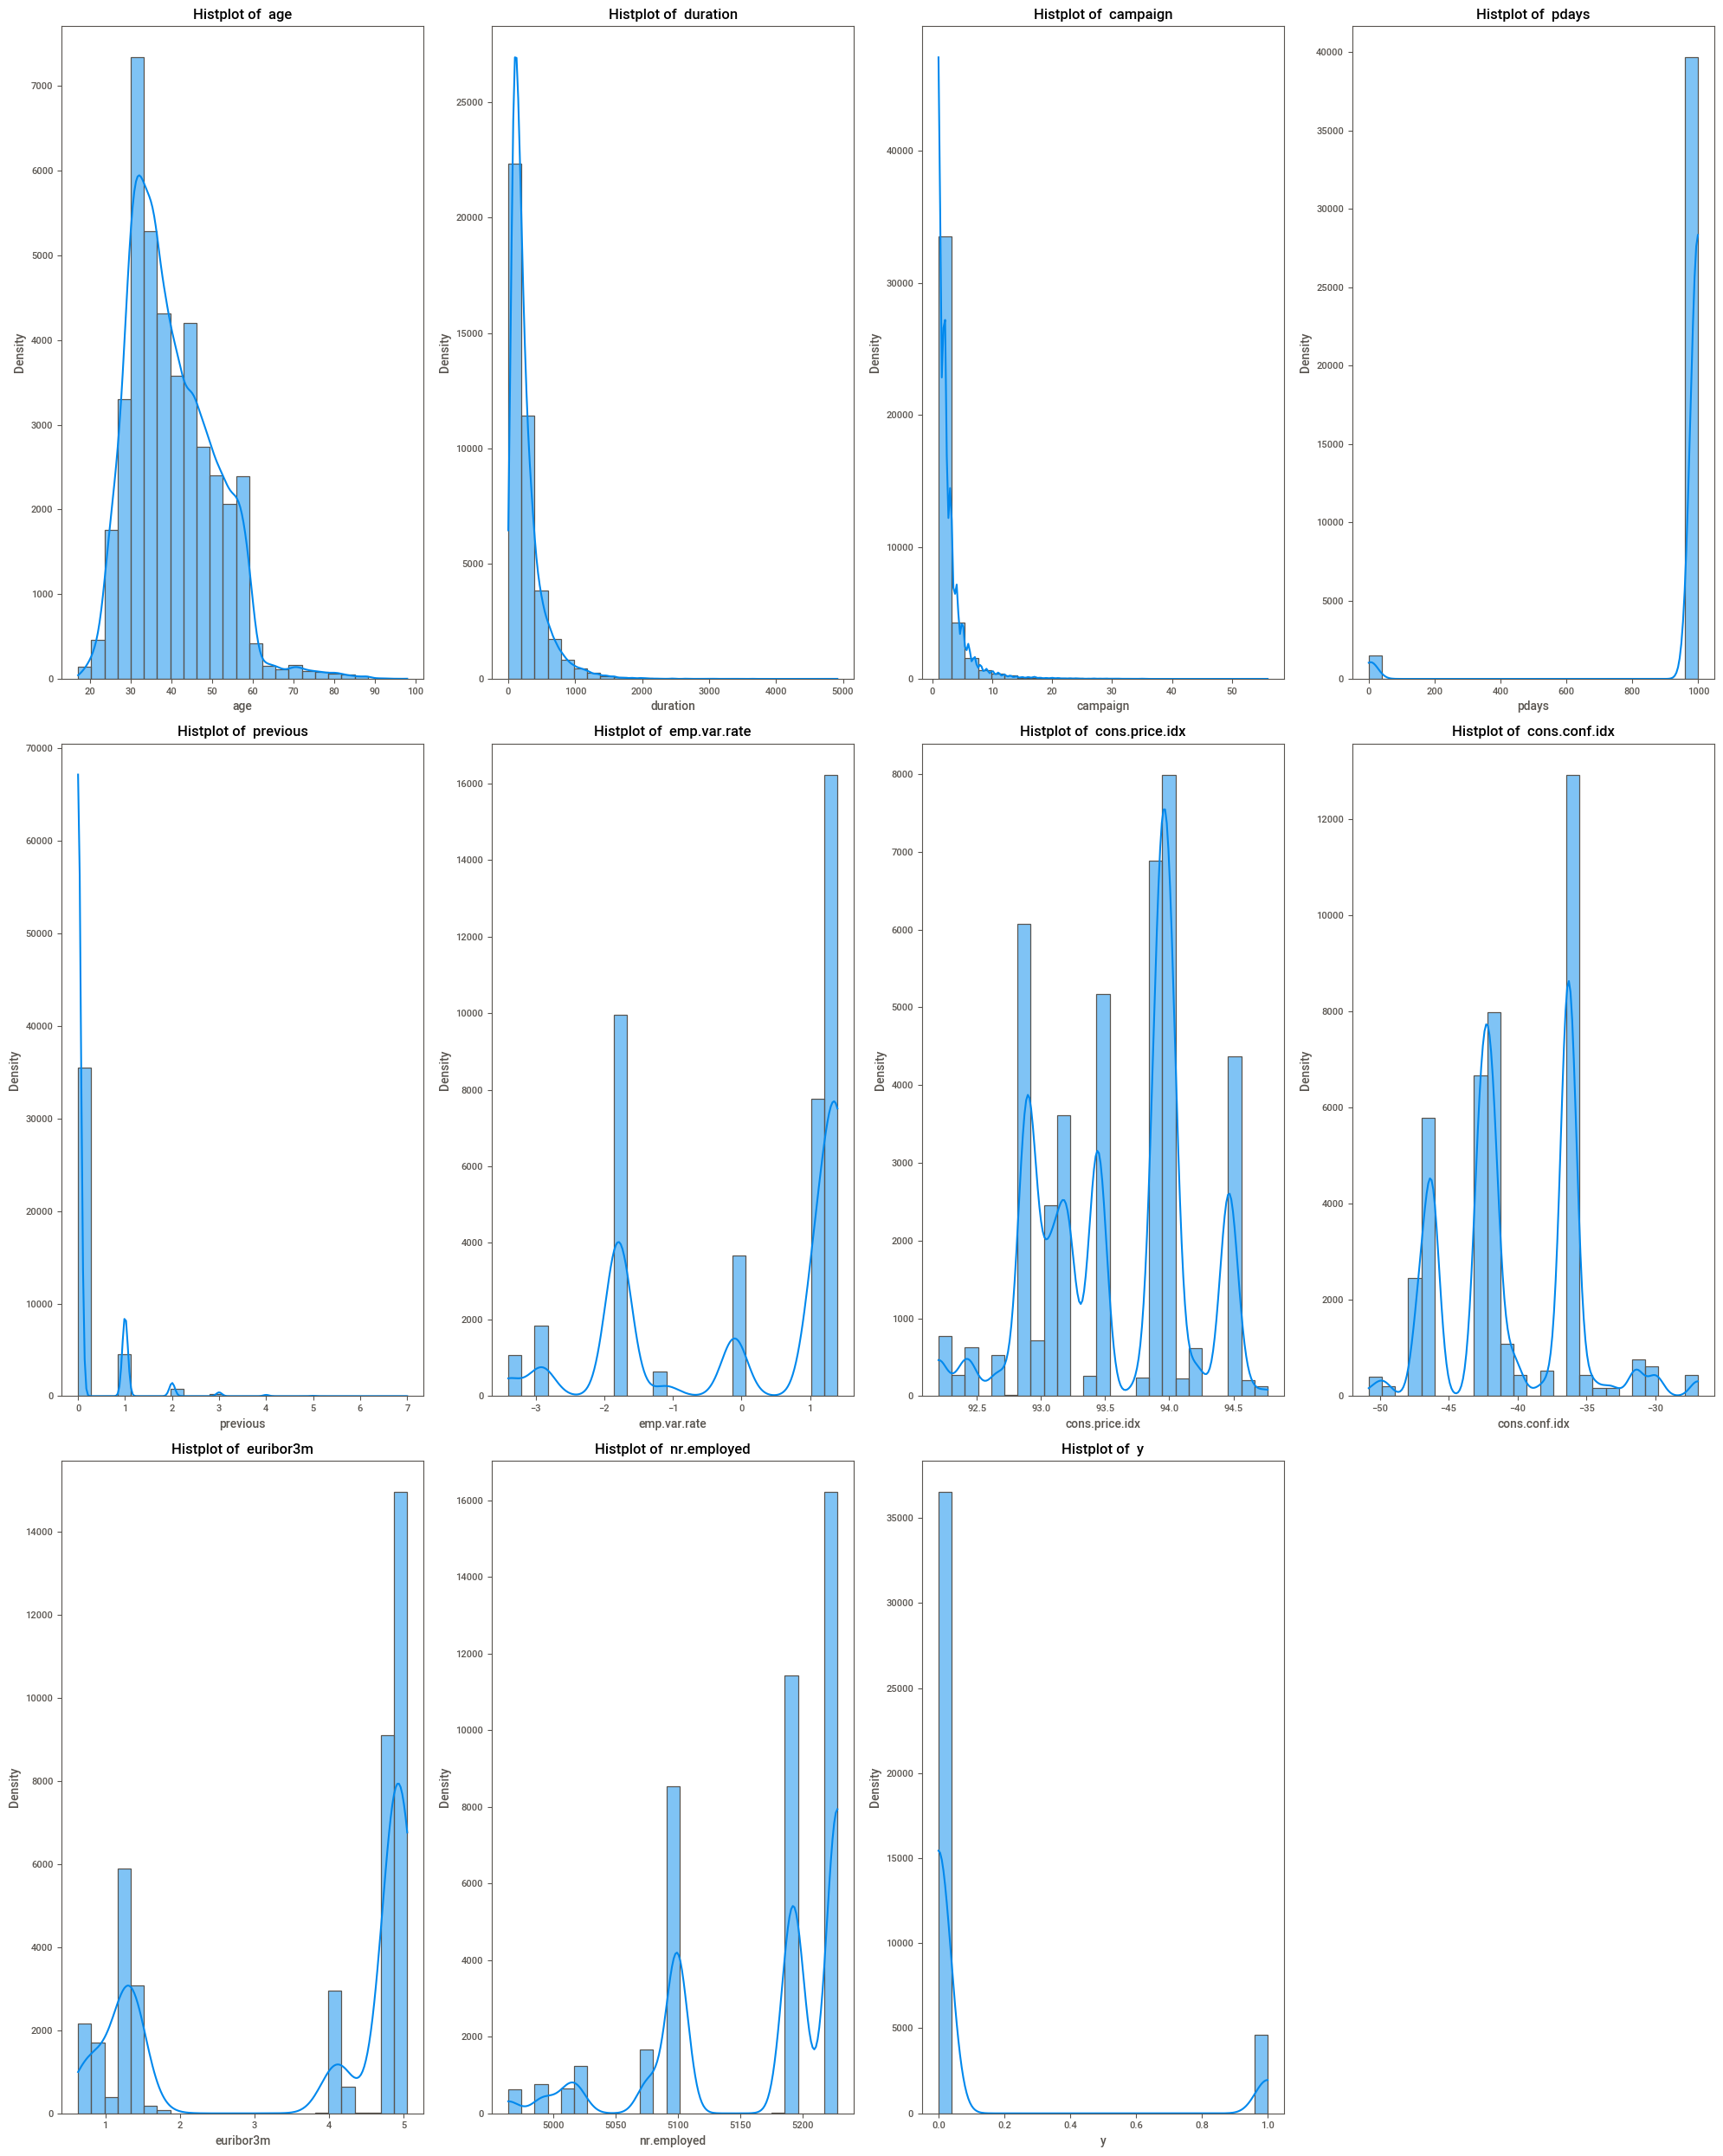

In [23]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in continous_data.columns:
    if plotnumber <= 12:
        plt.subplot(3,4, plotnumber)
        sns.histplot(x = df[column], kde = True, data = df, bins = 25)
        plt.title(f"Histplot of  {column}")
        plt.xlabel(column, fontsize = 10)
        plt.ylabel("Density", fontsize = 10)
        plotnumber += 1

plt.tight_layout()
plt.show()

## Bivariate Analysis of continous data:

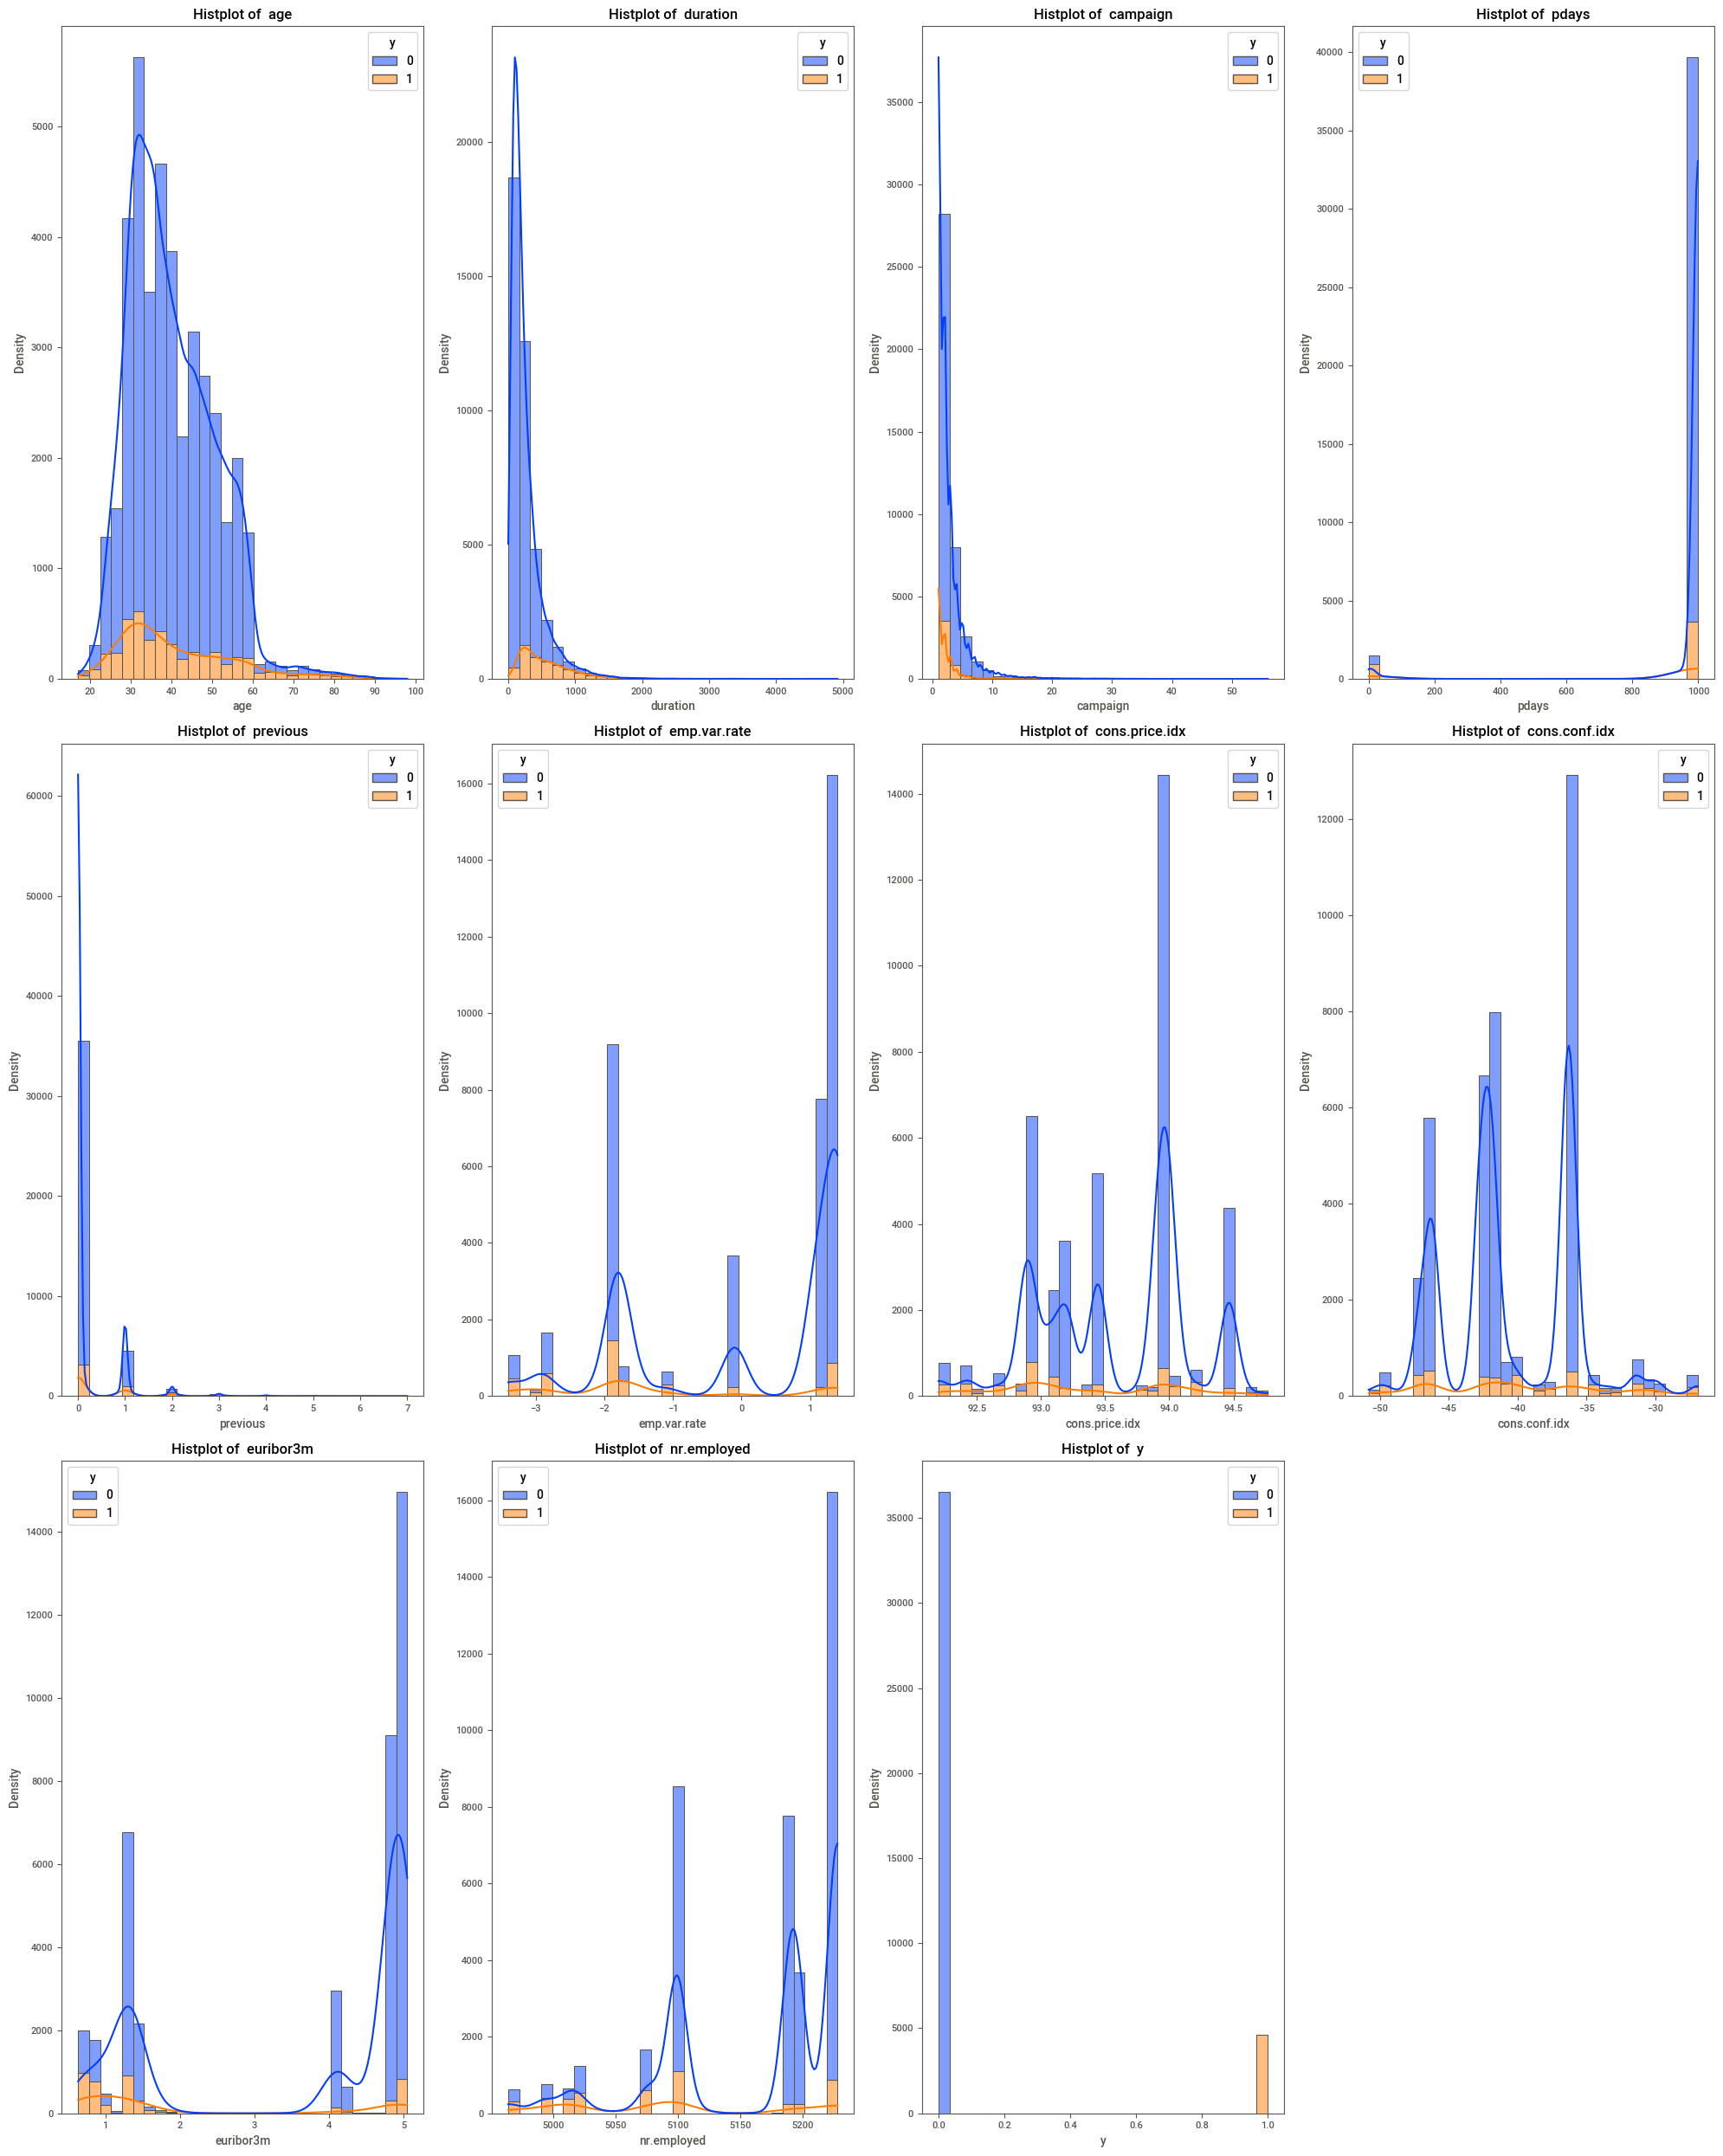

In [24]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in continous_data.columns:
    if plotnumber <= 12:
        plt.subplot(3,4, plotnumber)
        sns.histplot(x = df[column], kde = True,hue = df.y, multiple="stack", bins = 30, palette='bright')
        plt.title(f"Histplot of  {column}")
        plt.xlabel(column, fontsize = 10)
        plt.ylabel("Density", fontsize = 10)
        plotnumber += 1

plt.tight_layout()
plt.show()

## Univariate Analysis of categorical_column:

In [25]:
# lets separate(slicing) categorical column:
categorical_column=df[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']]
categorical_column.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome  
0         mon  nonexistent  
1         mon  nonexistent  
2         mon  nonexistent  
3         mon  nonexistent  
4         mon  nonexistent

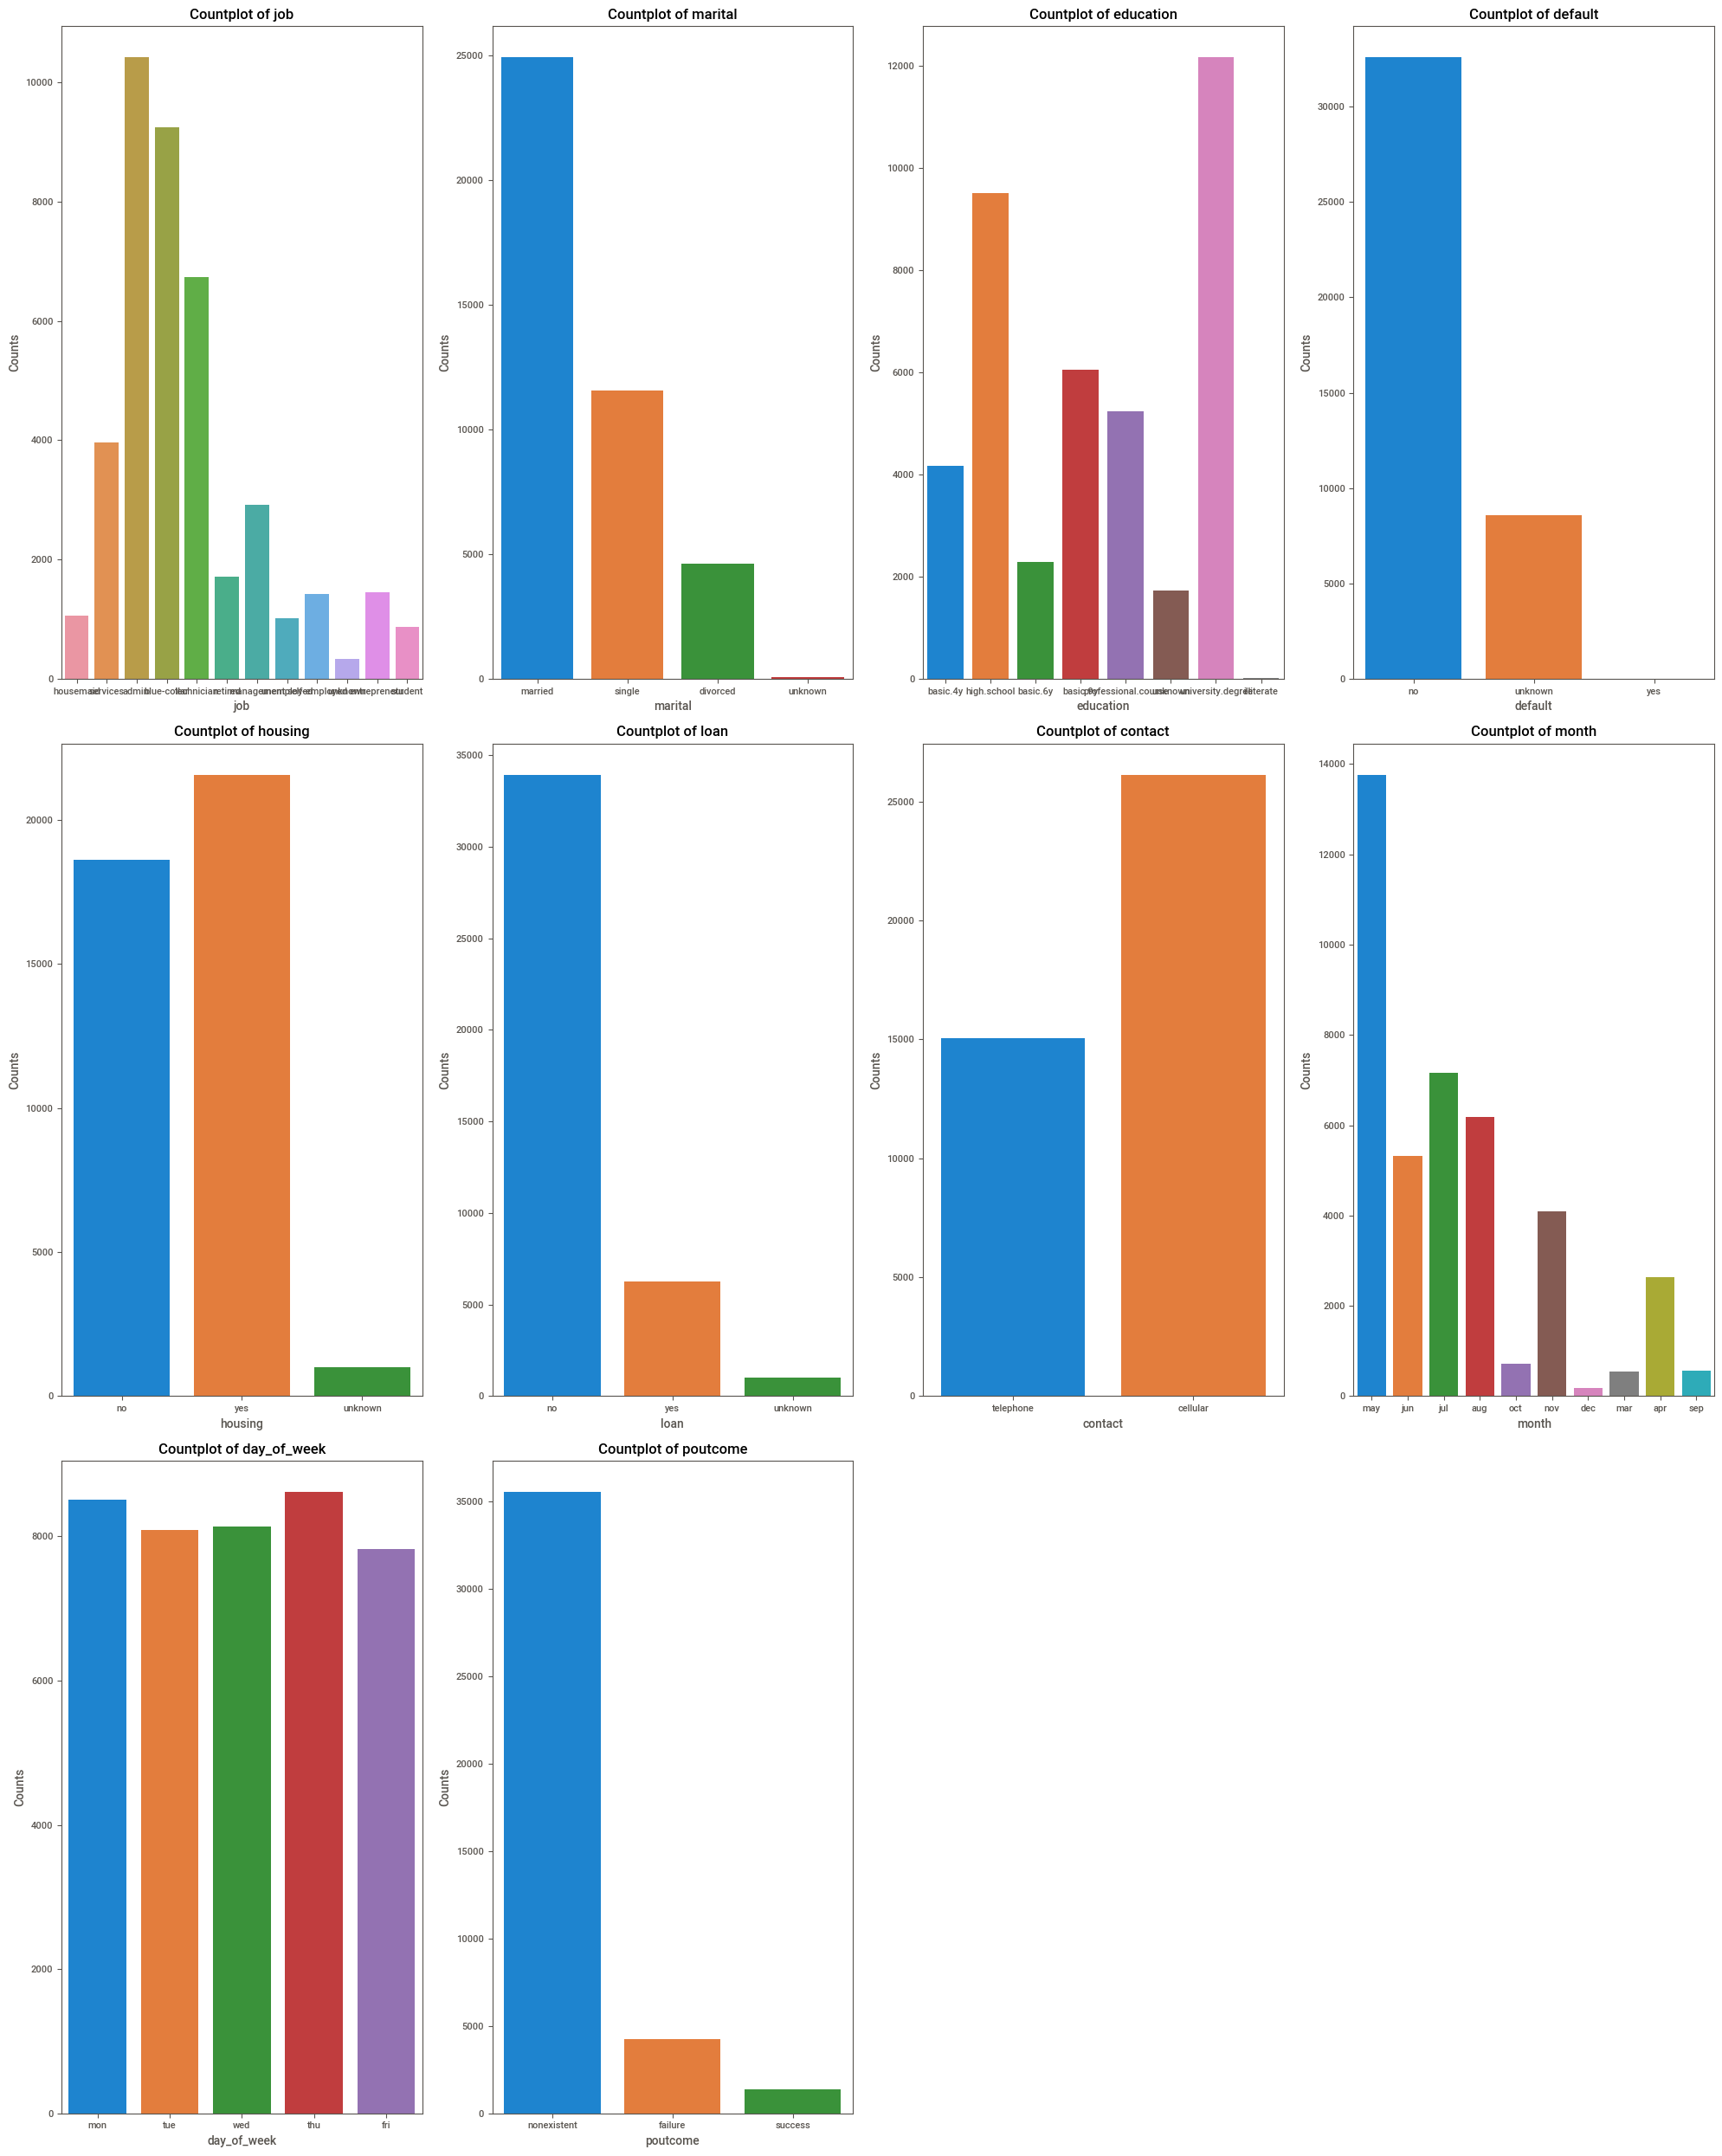

In [26]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1

for column in categorical_column.columns:
    if plotnum <= 10:
        plt.subplot(3,4,plotnum)
        sns.countplot(x=df[column])
        plt.title(f"Countplot of {column}")
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('Counts', fontsize = 10)
        plotnum += 1

plt.tight_layout()
plt.show()

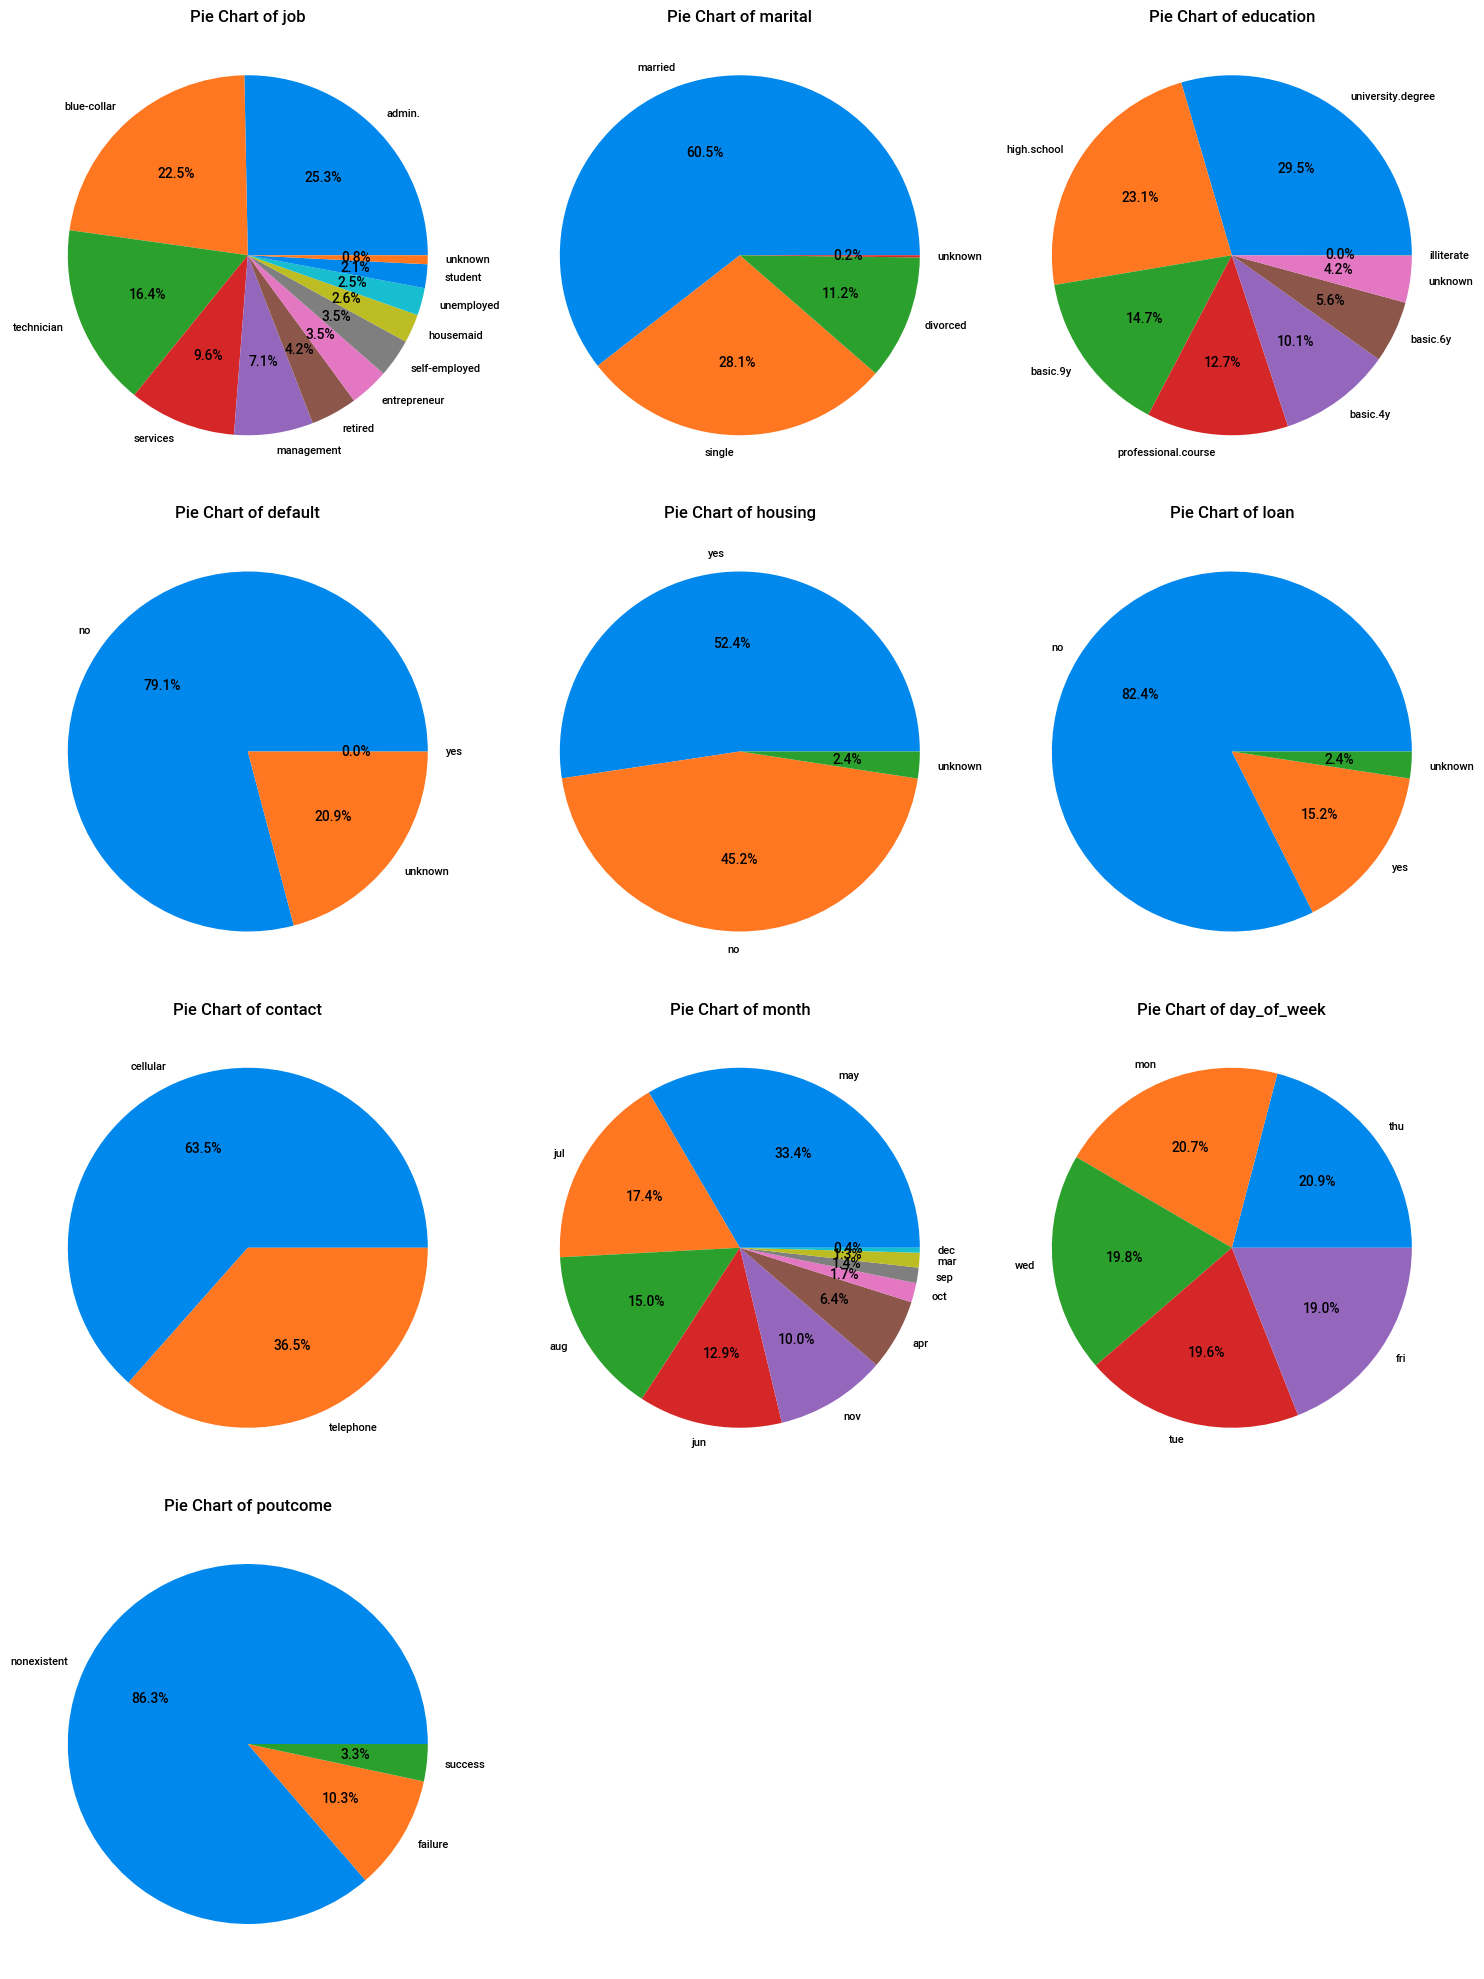

In [27]:
plt.figure(figsize=(15, 20), facecolor='white')
plotnum = 1
for column in categorical_column.columns:
    if plotnum <= 10:
        plt.subplot(4, 3, plotnum)
        counts = df[column].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
        plt.title(f"Pie Chart of {column}")
        plotnum += 1

plt.tight_layout()
plt.show()

## Bivariate Analysis of categorical_column

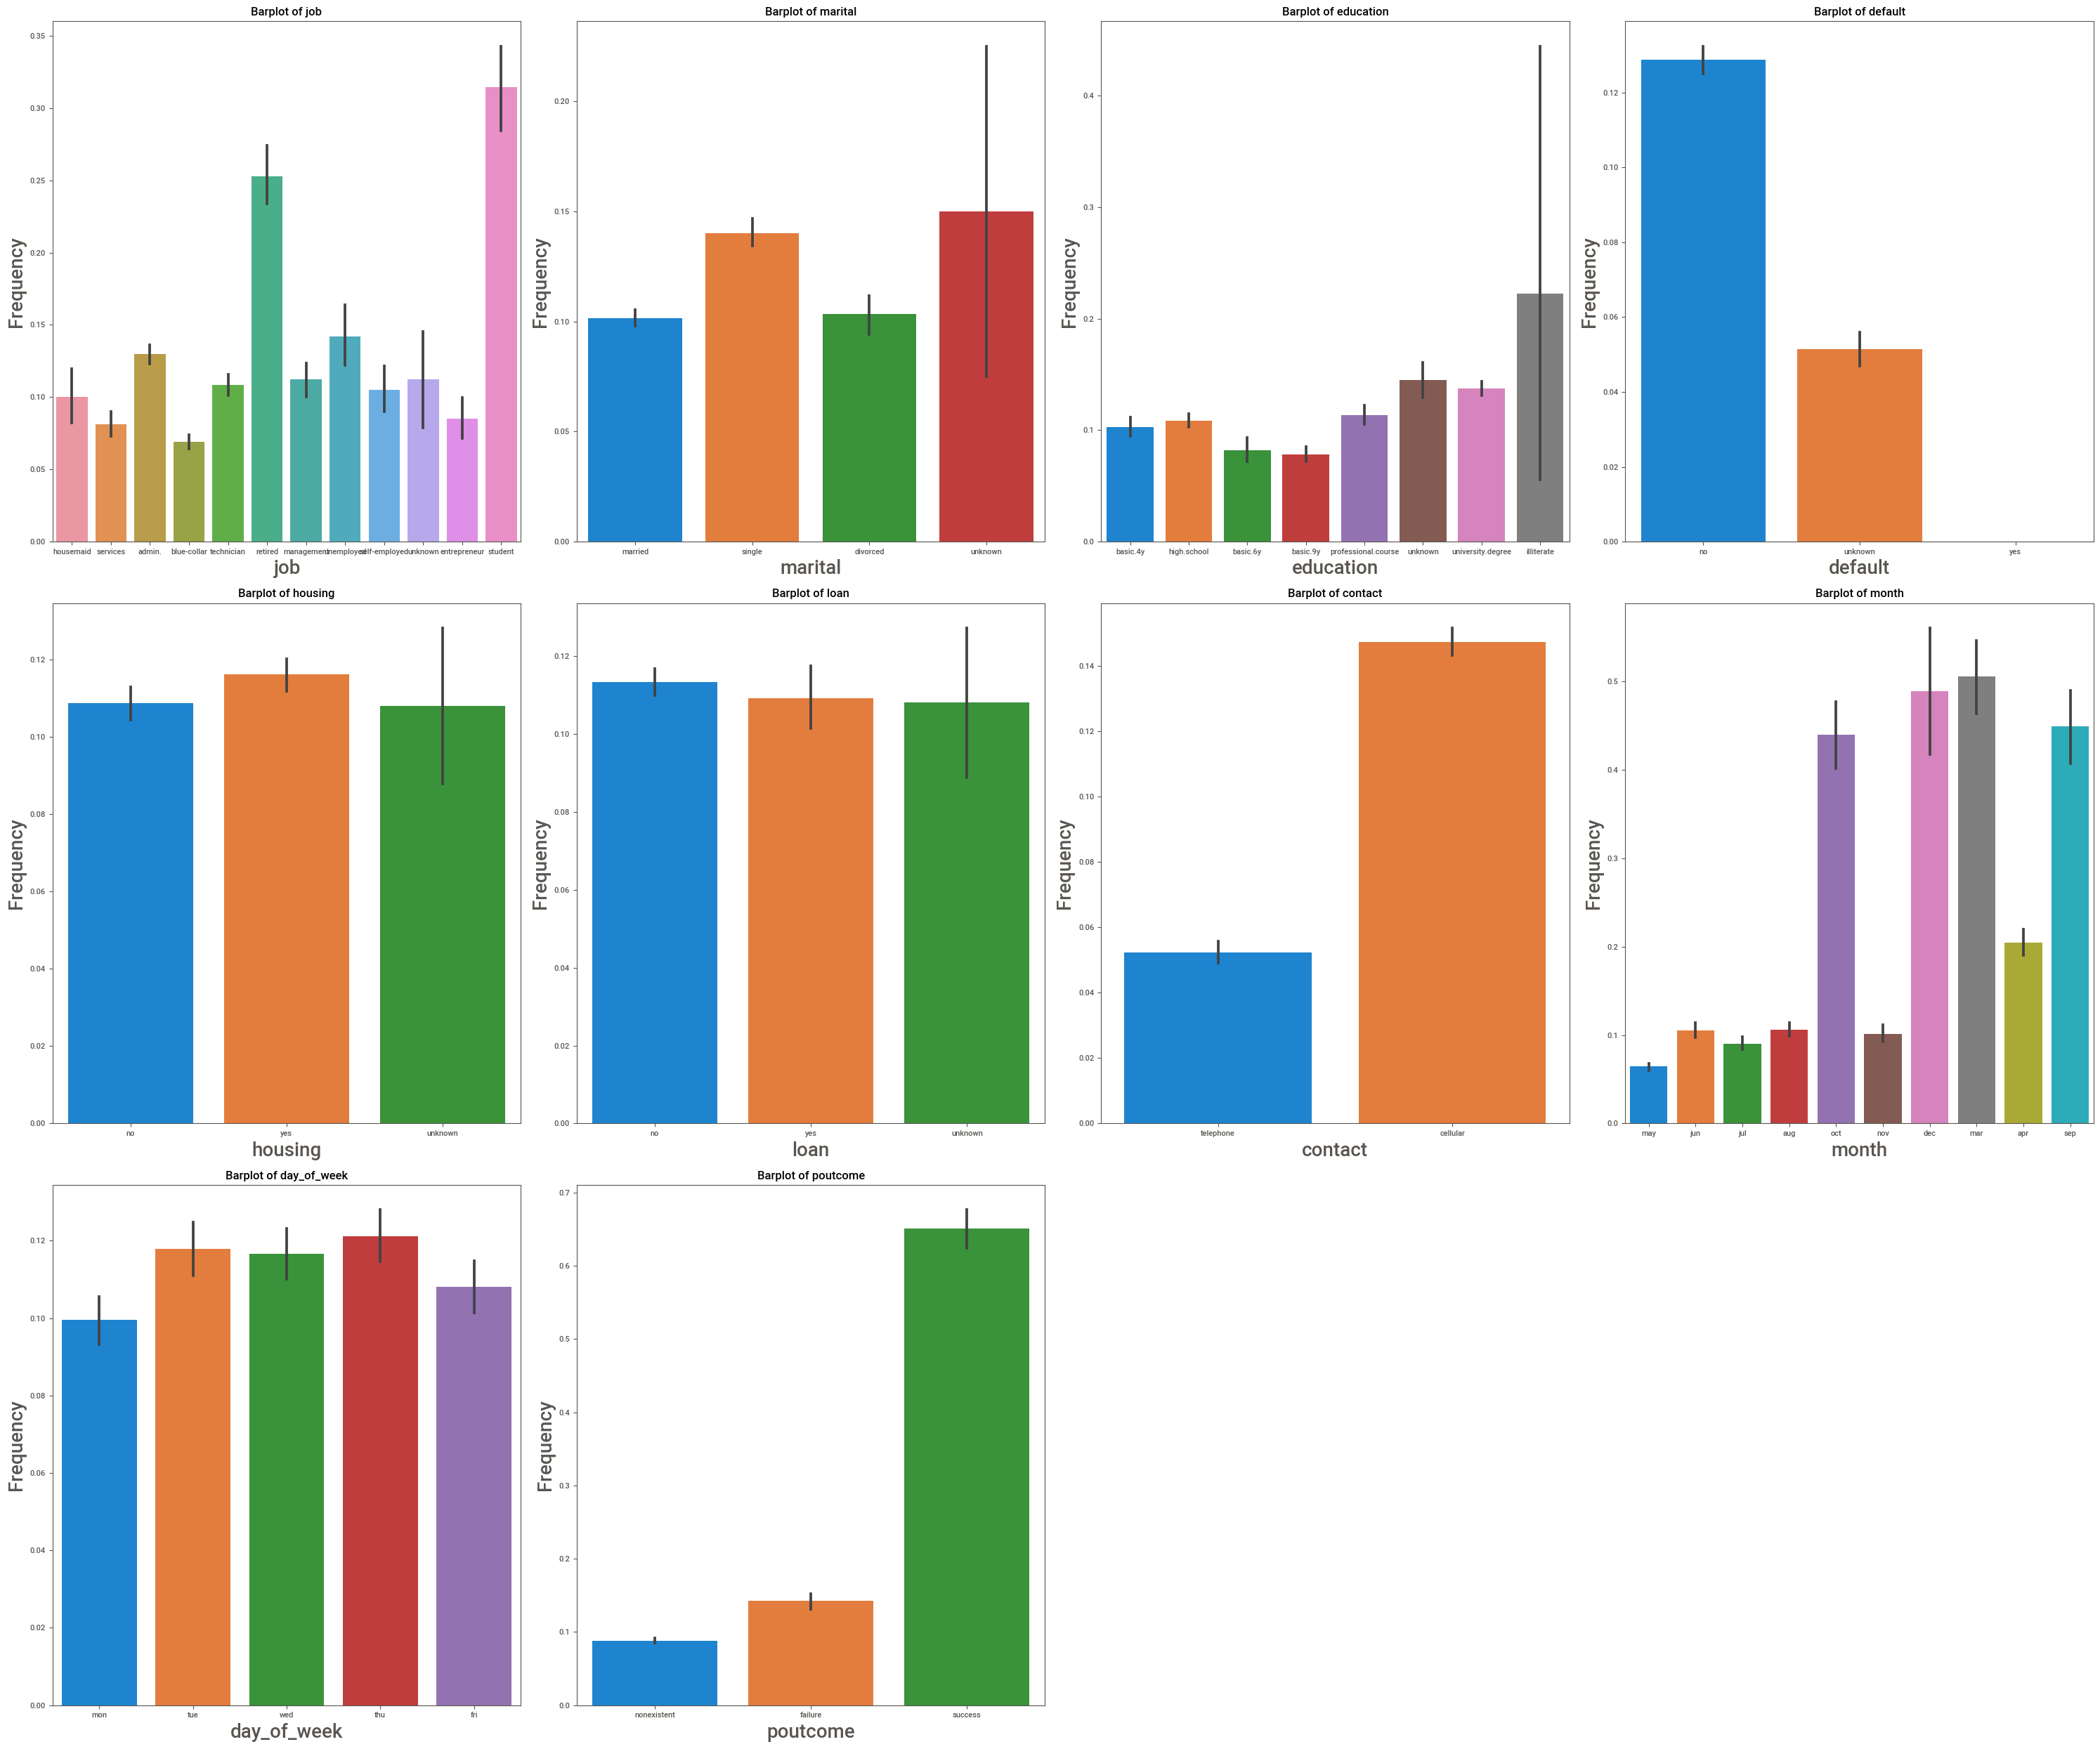

In [28]:
plt.figure(figsize = (30, 25), facecolor = 'white')
plotnumber = 1
for column in categorical_column.columns:
    if plotnumber<= 12:
        plt.subplot(3,4,plotnumber)
        sns.barplot(x = df[column], y = df.y)
        plt.title(f"Barplot of {column}")
        plt.xlabel(column, fontsize = 20)
        plt.ylabel("Frequency", fontsize = 20)
        plotnumber += 1

plt.tight_layout()
plt.show()

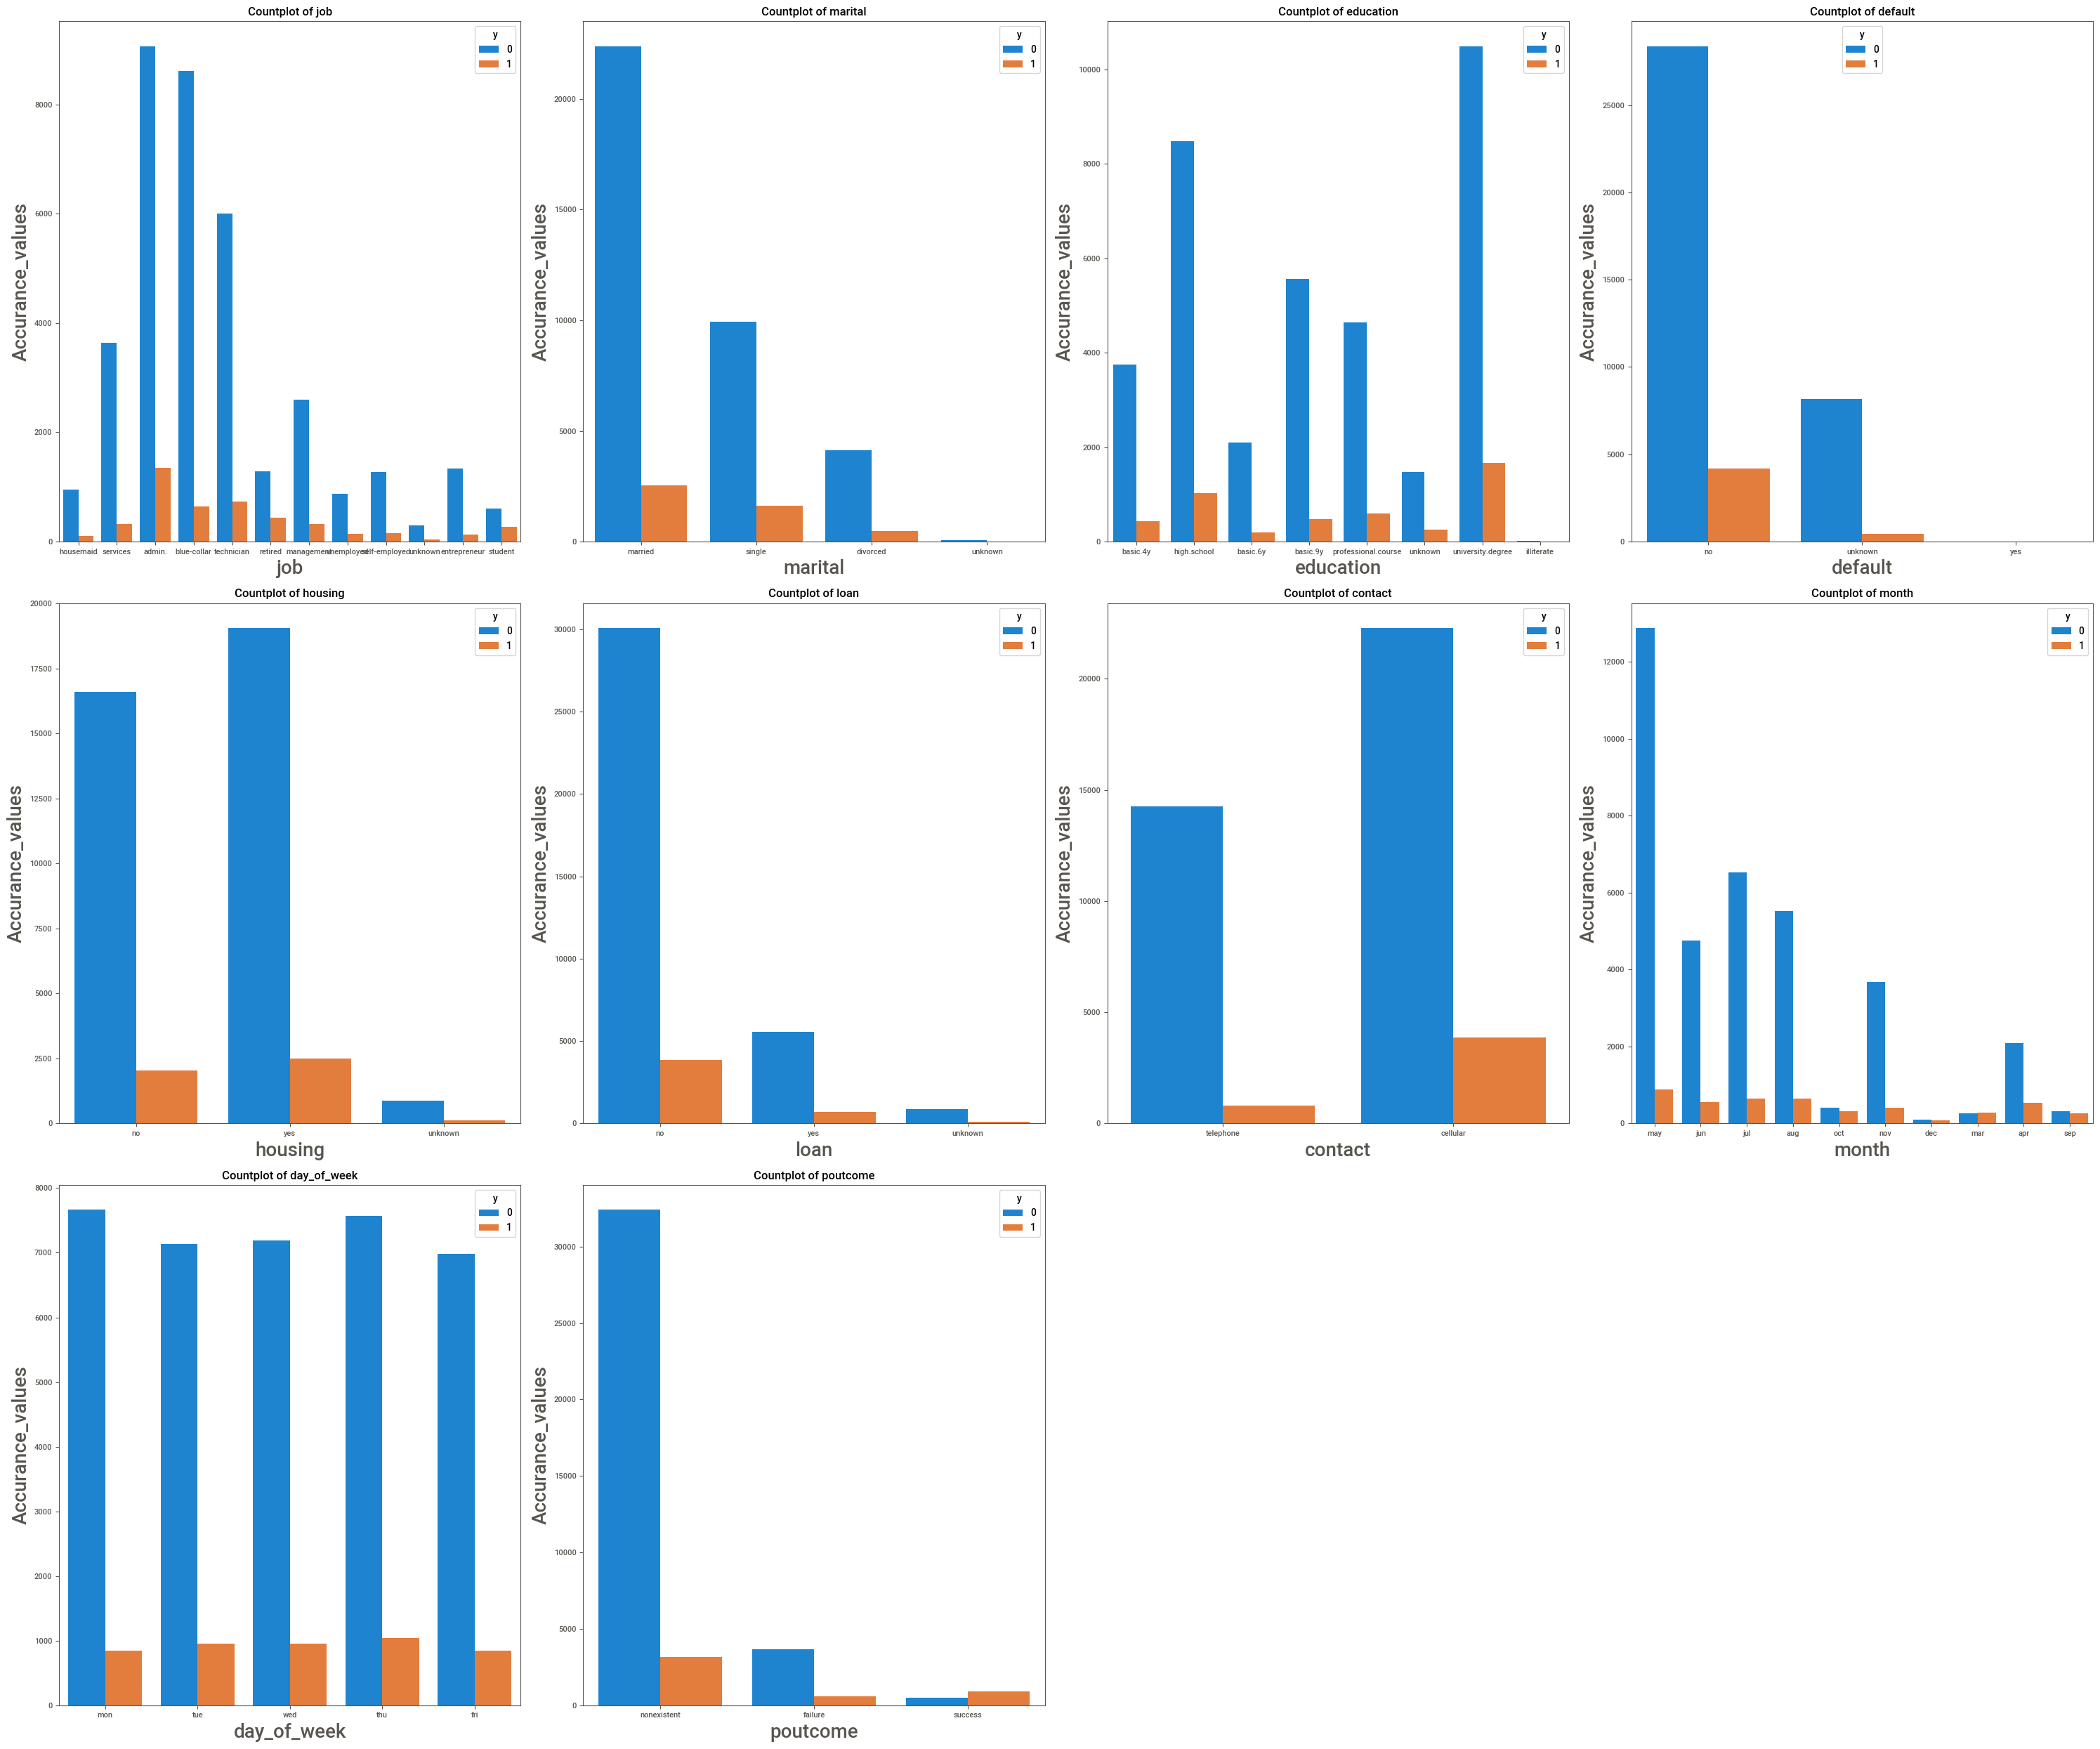

In [29]:
plt.figure(figsize = (30, 25), facecolor = 'white')
plotnumber = 1
for column in categorical_column.columns:
    if plotnumber <= 12:
        plt.subplot(3,4,plotnumber)
        sns.countplot(x = df[column], hue = df.y)
        plt.title(f"Countplot of {column}")
        plt.xlabel(column, fontsize = 20)
        plt.ylabel("Accurance_values", fontsize = 20)
        plotnumber += 1

plt.tight_layout()
plt.show()

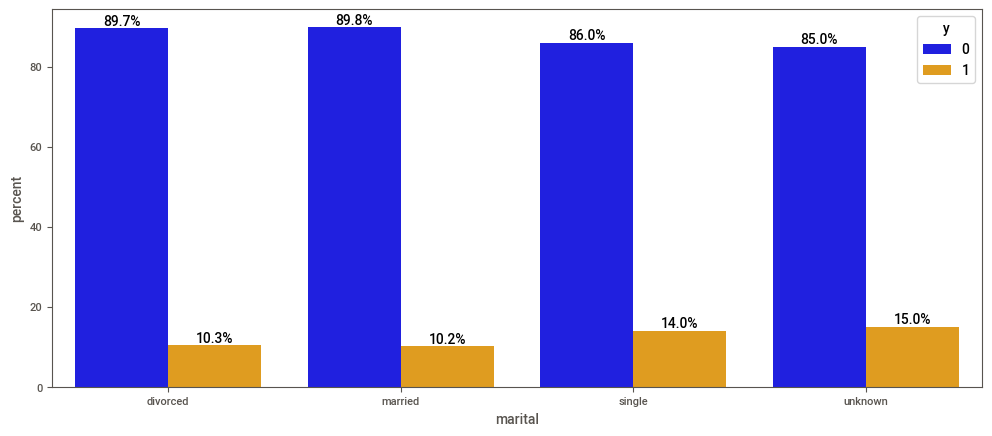

In [30]:
plt.figure(figsize=(12, 5))

# Calculate percentages
data_marital = (
    df.groupby("marital")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}


# Create the barplot with specified colors
ax = sns.barplot(x="marital", y="percent", hue="y", data=data_marital, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()
# We can use this code for all categorical and numerical columns

## Multivariate Analysis:

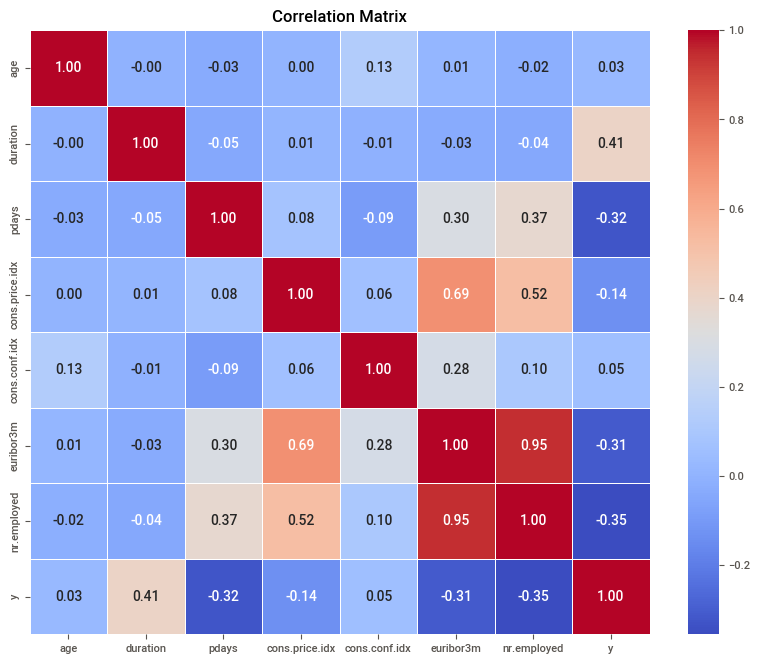

In [31]:
mult = df[['age', 'duration','pdays','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']]
correlation_matrix = mult.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Insights from the Multivariate Analysis :
1. **Duration Influence:** The duration of the last contact seems to have a notable positive correlation with the target variable (y), indicating that longer durations might lead to a higher likelihood of success in the outcome.

2. **Economic Factors:** Variables like the consumer price index (cons.price.idx) and the number of employees (nr.employed) show moderate correlations with the target variable. This suggests that economic conditions could play a role in determining the outcome.

3. **Interest Rates Impact:** The euribor 3-month rate (euribor3m) exhibits a strong negative correlation with the target variable. This implies that lower interest rates might positively influence the outcome.

4. **Contact Frequency:** Interestingly, the number of days since the client was last contacted (pdays) shows a significant negative correlation with the target variable. This indicates that more recent contact attempts might be more effective.

5. **Consumer Confidence:** The consumer confidence index (cons.conf.idx) has a slight positive correlation with the target variable. This suggests that higher consumer confidence levels might correspond to a slightly higher likelihood of success in the outcome.

6. **Age Factor:** Age (age) doesn't seem to have a strong correlation with the target variable. However, it's worth noting that it has a slight negative correlation, indicating that older clients might be slightly less likely to achieve the desired outcome.

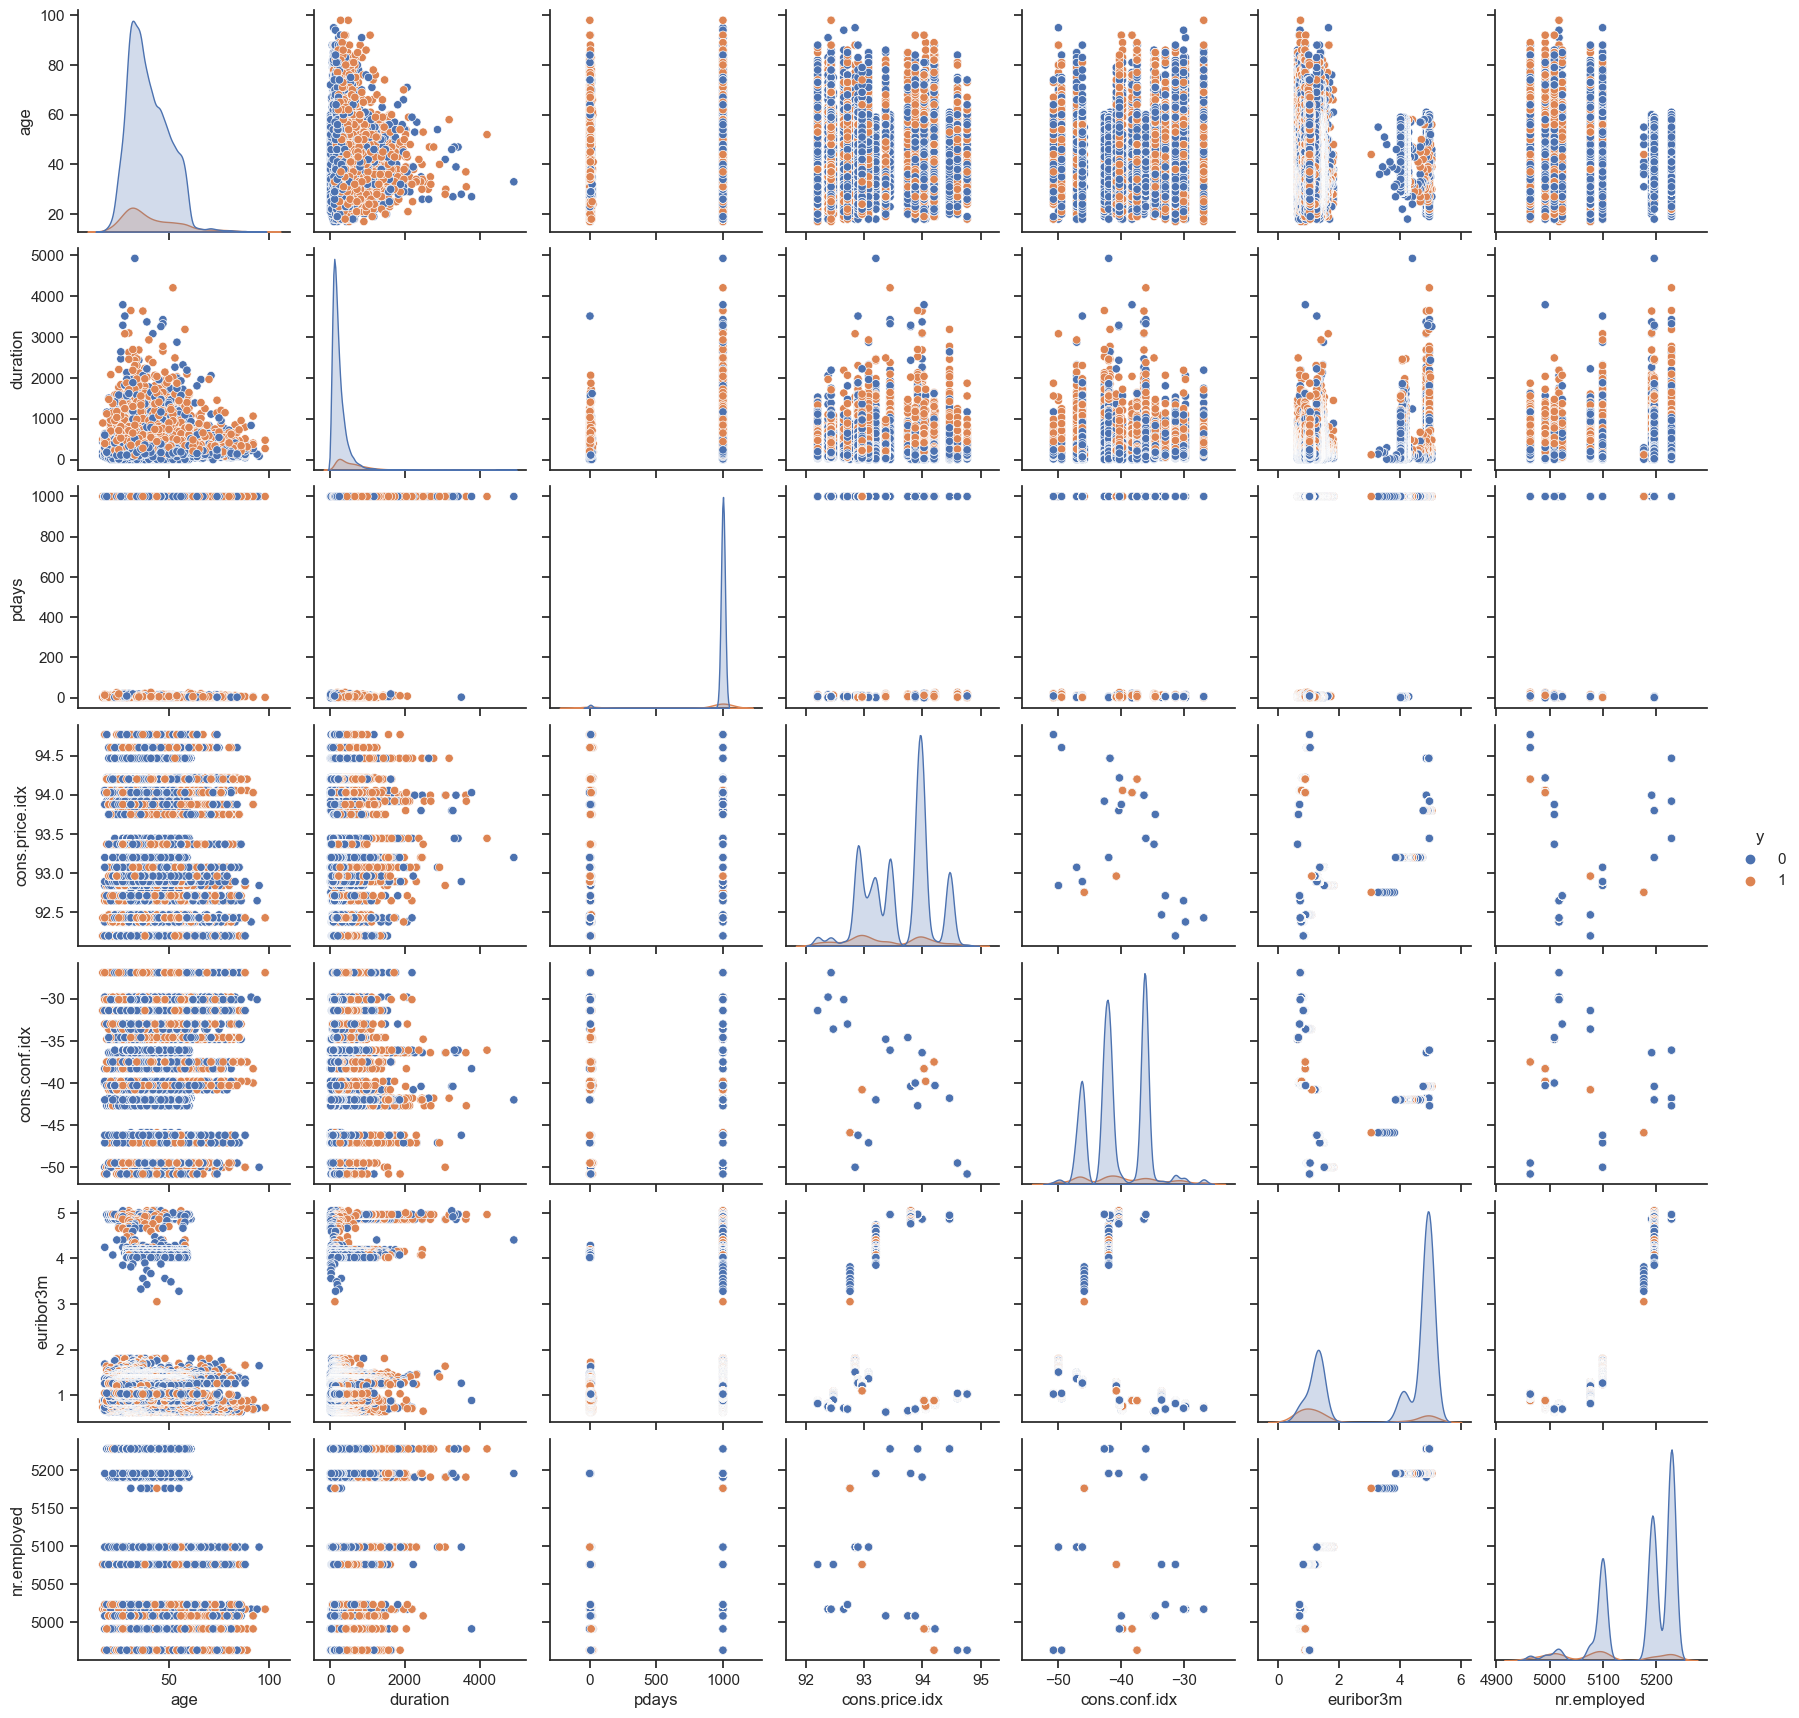

In [32]:
sns.set(style = 'ticks')
sns.pairplot(mult, diag_kind='kde', hue = 'y')
plt.show()


In [33]:
df.median()

age                 38.000
duration           180.000
campaign             2.000
pdays              999.000
previous             0.000
emp.var.rate         1.100
cons.price.idx      93.749
cons.conf.idx      -41.800
euribor3m            4.857
nr.employed       5191.000
y                    0.000
dtype: float64

In [34]:
df.corr()

age  duration  campaign     pdays  previous  \
age             1.000000 -0.000808  0.004622 -0.034381  0.024379   
duration       -0.000808  1.000000 -0.071765 -0.047556  0.020600   
campaign        0.004622 -0.071765  1.000000  0.052606 -0.079182   
pdays          -0.034381 -0.047556  0.052606  1.000000 -0.587508   
previous        0.024379  0.020600 -0.079182 -0.587508  1.000000   
emp.var.rate   -0.000242 -0.027941  0.150786  0.271063 -0.420587   
cons.price.idx  0.001009  0.005303  0.127826  0.078920 -0.203197   
cons.conf.idx   0.129075 -0.008126 -0.013657 -0.091374 -0.050929   
euribor3m       0.010852 -0.032861  0.135169  0.296946 -0.454571   
nr.employed    -0.017607 -0.044672  0.144129  0.372659 -0.501411   
y               0.030381  0.405297 -0.066361 -0.324948  0.230202   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000242        0.001009       0.129075   0.010852   
duration           -0.027941        0.005303      -0.008126  -0.032861   
campaign            0.150786        0.127826      -0.013657   0.135169   
pdays               0.271063        0.078920      -0.091374   0.296946   
previous           -0.420587       -0.203197      -0.050929  -0.454571   
emp.var.rate        1.000000        0.775293       0.196257   0.972244   
cons.price.idx      0.775293        1.000000       0.059170   0.688180   
cons.conf.idx       0.196257        0.059170       1.000000   0.277864   
euribor3m           0.972244        0.688180       0.277864   1.000000   
nr.employed         0.906949        0.521945       0.100679   0.945146   
y                  -0.298289       -0.136134       0.054802  -0.307740   

                nr.employed         y  
age               -0.017607  0.030381  
duration          -0.044672  0.405297  
campaign           0.144129 -0.066361  
pdays              0.372659 -0.324948  
previous          -0.501411  0.230202  
emp.var.rate       0.906949 -0.298289  
cons.price.idx     0.521945 -0.136134  
cons.conf.idx      0.100679  0.054802  
euribor3m          0.945146 -0.307740  
nr.employed        1.000000 -0.354669  
y                 -0.354669  1.000000

### Insights:
This correlation matrix reveals the relationships between various features and the target variable 'y', representing whether a client subscribed to a term deposit or not.

1. **Duration (0.405):** There is a moderate positive correlation between the duration of the last contact and the client's subscription status, indicating that longer call durations are associated with a higher likelihood of subscription.

2. **Pdays (-0.325):** There is a moderate negative correlation between the number of days since the client was last contacted and their subscription status, suggesting that clients contacted more recently are more likely to subscribe.

3. **Previous (0.230):** There is a moderate positive correlation between the number of contacts performed before this campaign and the client's subscription status, indicating that clients who were contacted more frequently in the past are more likely to subscribe.

4. **Euribor3m (-0.308):** There is a moderate negative correlation between the Euribor 3-month rate and the client's subscription status, suggesting that lower Euribor rates are associated with a higher likelihood of subscription.

5. **Nr.employed (-0.355):** There is a moderate negative correlation between the number of employees and the client's subscription status, indicating that higher employment rates are associated with a lower likelihood of subscription.

## Data Preprocessing:

In [35]:
# Checking null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [36]:
# Statistical Measures of numerical features:
df.describe()

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41176.000000    41176.000000   41176.000000  41176.000000   
mean       0.081922       93.575720     -40.502863      3.621293   
std        1.570883        0.578839       4.627860      1.734437   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed             y  
count  41176.000000  41176.000000  
mean    5167.034870      0.112663  
std       72.251364      0.316184  
min     4963.600000      0.000000  
25%     5099.100000      0.000000  
50%     5191.000000      0.000000  
75%     5228.100000      0.000000  
max     5228.100000      1.000000

In [37]:
# Statistical Measures of categorical features:
# include='O' is use to display object datatype
df.describe(include= 'O')

job  marital          education default housing   loan   contact  \
count    41176    41176              41176   41176   41176  41176     41176   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10419    24921              12164   32577   21571  33938     26135   

        month day_of_week     poutcome  
count   41176       41176        41176  
unique     10           5            3  
top       may         thu  nonexistent  
freq    13767        8618        35551

### Insights from the categorical features
1. **Job:**

- There are 12 unique job categories.
- The most common job category is 'admin.', with 10,422 occurrences.

2. **Marital:**

- There are 4 unique marital status categories.
- The most common marital status is 'married', with 24,928 occurrences.

3. **Education:**

- There are 8 unique education level categories.
- The most common education level is 'university.degree', with 12,168 occurrences.

4. **Default:**

- There are 3 unique categories indicating whether clients have credit in default ('yes', 'no', 'unknown').
- The majority of clients (32,588) have no default.

5. **Housing:**

- There are 3 unique categories indicating whether clients have a housing loan ('yes', 'no', 'unknown').
- The majority of clients (21,576) have a housing loan.

6. **Loan:**

- There are 3 unique categories indicating whether clients have a personal loan ('yes', 'no', 'unknown').
- The majority of clients (33,950) do not have a personal loan.

7. **Contact:**

- There are 2 unique categories indicating the contact communication type ('cellular', 'telephone').
- The most common contact communication type is 'cellular', with 26,144 occurrences.

8. **Month:**

- There are 10 unique categories representing the last contact month of the year.
- The most common month for contacts is 'May', with 13,769 occurrences.

9. **Day of Week:**

- There are 5 unique categories representing the last contact day of the week.
- The most common day for contacts is 'Thursday' (thu), with 8,623 occurrences.

10. **Poutcome:**

- There are 3 unique categories representing the outcome of the previous marketing campaign ('failure', 'nonexistent', 'success').
- The most common outcome is 'nonexistent', indicating that in most cases, there was no previous campaign outcome recorded.

In [38]:
categorical_col = []
for column in df.columns:
    if df[column].dtypes == object and len(df[column].unique())  <= 50:
        categorical_col.append(column)
        print(f"{column}:{df[column].unique()}")
        print("***************************")

job:['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
***************************
marital:['married' 'single' 'divorced' 'unknown']
***************************
education:['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
***************************
default:['no' 'unknown' 'yes']
***************************
housing:['no' 'yes' 'unknown']
***************************
loan:['no' 'yes' 'unknown']
***************************
contact:['telephone' 'cellular']
***************************
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
***************************
day_of_week:['mon' 'tue' 'wed' 'thu' 'fri']
***************************
poutcome:['nonexistent' 'failure' 'success']
***************************


In [39]:
# Replacement of unknown values in each feature with mode of that features:
for feature in categorical_column.columns:
    mode_value = df[feature].mode()[0]
    df[feature].replace('unknown', mode_value, inplace = True)

In [40]:
# Encoding of categorical columns:
LE = LabelEncoder()

**Ordinal Features Encoding :**

"job" and "education" appear to have categories that could have a natural order or ranking. For example, "basic.4y" may be considered lower in terms of education compared to "university.degree"

In [41]:
ordinal_features = df[['education']]

In [42]:
for column in ordinal_features.columns:
    df[column] = LE.fit_transform(df[column])

**Nominal Encoding:**

In [43]:
nominal_features  = ['job','marital','default','housing', 'loan','contact','month','day_of_week','poutcome']
df = pd.get_dummies(df, columns = nominal_features, drop_first= True)

In [44]:
df.head()

age  education  duration  campaign  pdays  previous  emp.var.rate  \
0   56          0       261         1    999         0           1.1   
1   57          3       149         1    999         0           1.1   
2   37          3       226         1    999         0           1.1   
3   40          1       151         1    999         0           1.1   
4   56          3       307         1    999         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  job_blue-collar  \
0          93.994          -36.4      4.857       5191.0  0                0   
1          93.994          -36.4      4.857       5191.0  0                0   
2          93.994          -36.4      4.857       5191.0  0                0   
3          93.994          -36.4      4.857       5191.0  0                0   
4          93.994          -36.4      4.857       5191.0  0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              1               0            0   
1                 0              0               0            0   
2                 0              0               0            0   
3                 0              0               0            0   
4                 0              0               0            0   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               0   
1                  0             1            0               0   
2                  0             1            0               0   
3                  0             0            0               0   
4                  0             1            0               0   

   job_unemployed  marital_married  marital_single  default_yes  housing_yes  \
0               0                1               0            0            0   
1               0                1               0            0            0   
2               0                1               0            0            1   
3               0                1               0            0            0   
4               0                1               0            0            0   

   loan_yes  contact_telephone  month_aug  month_dec  month_jul  month_jun  \
0         0                  1          0          0          0          0   
1         0                  1          0          0          0          0   
2         0                  1          0          0          0          0   
3         0                  1          0          0          0          0   
4         1                  1          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0          0          1          0          0          0                1   
1          0          1          0          0          0                1   
2          0          1          0          0          0                1   
3          0          1          0          0          0                1   
4          0          1          0          0          0                1   

   day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_nonexistent  \
0                0                0                0                     1   
1                0                0                0                     1   
2                0                0                0                     1   
3                0                0                0                     1   
4                0                0                0                     1   

   poutcome_success  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

## Handling Outlier :

In [45]:
boxplot_info = {}

for column in continous_data.columns[:-1]:
    Q1 = continous_data[column].quantile(0.25)
    Q3 = continous_data[column].quantile(0.75)
    IQR = Q3 - Q1
    min_limit = Q1 - 1.5 * IQR
    max_limit = Q3 + 1.5 * IQR
    boxplot_info[column] = {
        "Min_limit": min_limit,
        "Max_limit": max_limit,
        "IQR": IQR
    }

for column, info in boxplot_info.items():
    print(f"Column: {column}")
    print(f"Min_limit: {info['Min_limit']}, Max_limit: {info['Max_limit']}, IQR: {info['IQR']}")
    print("------------")


Column: age
Min_limit: 9.5, Max_limit: 69.5, IQR: 15.0
------------
Column: duration
Min_limit: -223.5, Max_limit: 644.5, IQR: 217.0
------------
Column: campaign
Min_limit: -2.0, Max_limit: 6.0, IQR: 2.0
------------
Column: pdays
Min_limit: 999.0, Max_limit: 999.0, IQR: 0.0
------------
Column: previous
Min_limit: 0.0, Max_limit: 0.0, IQR: 0.0
------------
Column: emp.var.rate
Min_limit: -6.6000000000000005, Max_limit: 6.200000000000001, IQR: 3.2
------------
Column: cons.price.idx
Min_limit: 91.69650000000001, Max_limit: 95.3725, IQR: 0.9189999999999969
------------
Column: cons.conf.idx
Min_limit: -52.150000000000006, Max_limit: -26.949999999999992, IQR: 6.300000000000004
------------
Column: euribor3m
Min_limit: -4.081499999999999, Max_limit: 10.3865, IQR: 3.617
------------
Column: nr.employed
Min_limit: 4905.6, Max_limit: 5421.6, IQR: 129.0
------------


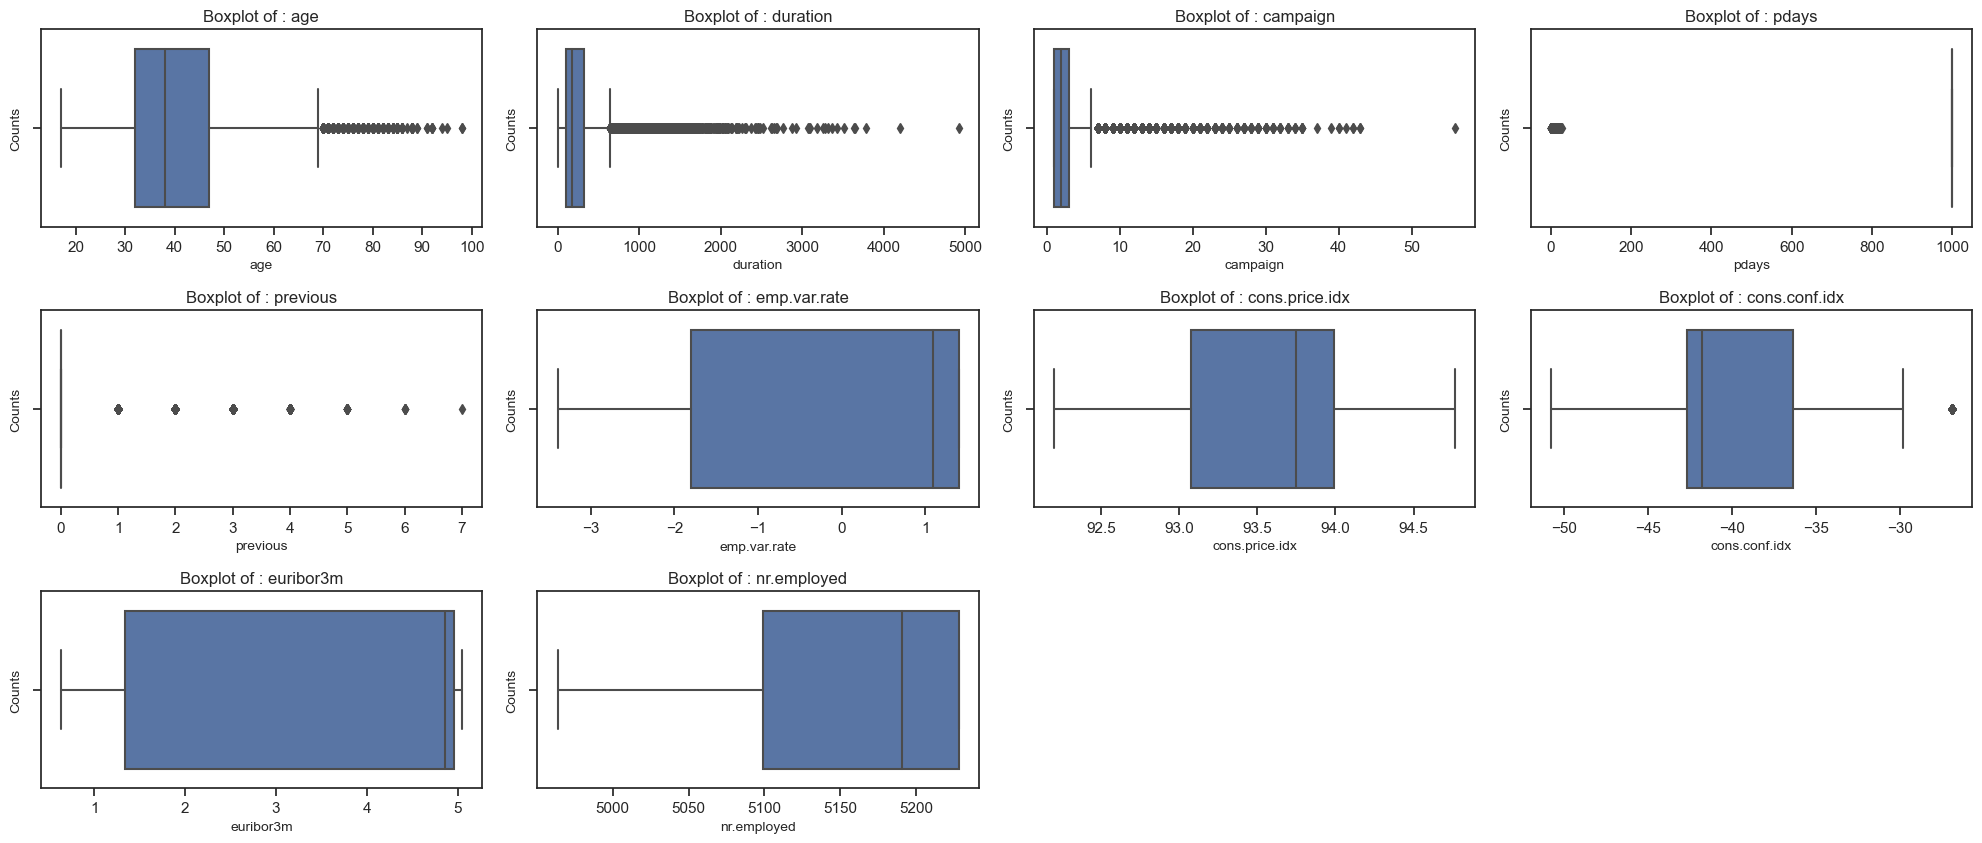

In [46]:
# lets see it through boxplot and observe plots ,min_limits, max_limits, IQR and also outlier 
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in continous_data.columns[:-1]:
    if plotnumber <= 36:
        plt.subplot(9,4,plotnumber)
        sns.boxplot(x = continous_data[column])
        plt.title(f"Boxplot of : {column}")
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('Counts', fontsize = 10)
        plotnumber += 1

plt.tight_layout()
plt.show()


In [47]:
# lets check how many outlier each feature have :

def identify_outlier(column):
    q1= continous_data[column].quantile(0.25)
    q3 = continous_data[column].quantile(0.75)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    outliers = continous_data[(continous_data[column] < min_limit) | (continous_data[column] > max_limit)]
    return outliers

for column in continous_data.columns[:-1]:
    outliers = identify_outlier(column)
    outliers_counts = len(outliers)
    if outliers_counts >= 0:
        print(f"feature {column} has {outliers_counts}  outliers")
        print("--------------")

feature age has 468  outliers
--------------
feature duration has 2963  outliers
--------------
feature campaign has 2406  outliers
--------------
feature pdays has 1515  outliers
--------------
feature previous has 5625  outliers
--------------
feature emp.var.rate has 0  outliers
--------------
feature cons.price.idx has 0  outliers
--------------
feature cons.conf.idx has 446  outliers
--------------
feature euribor3m has 0  outliers
--------------
feature nr.employed has 0  outliers
--------------


In [48]:
# Replace the oulier values in continous features is replaced with median value of each features:
outlier_feature = continous_data[['age','previous','cons.conf.idx']]

In [49]:
for column in outlier_feature.columns:
    q1 = continous_data[column].quantile(0.25)
    q3 = continous_data[column].quantile(0.75)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    continous_data[column] = np.where((continous_data[column]< min_limit) | (continous_data[column] > max_limit),
                         continous_data[column].median(),continous_data[column])


In [50]:
# Replacing outliers in discrete values with mode of that features:

discrete_outlier = continous_data[['duration','previous' ,'campaign', 'pdays']]

for column in discrete_outlier.columns:
    q1 = continous_data[column].quantile(0.25)
    q3 = continous_data[column].quantile(0.75)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    continous_data[column] = np.where((continous_data[column]<min_limit) | (continous_data[column]>max_limit),
                         continous_data[column].mode()[0], continous_data[column])

In [51]:
df.head()

age  education  duration  campaign  pdays  previous  emp.var.rate  \
0   56          0       261         1    999         0           1.1   
1   57          3       149         1    999         0           1.1   
2   37          3       226         1    999         0           1.1   
3   40          1       151         1    999         0           1.1   
4   56          3       307         1    999         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  job_blue-collar  \
0          93.994          -36.4      4.857       5191.0  0                0   
1          93.994          -36.4      4.857       5191.0  0                0   
2          93.994          -36.4      4.857       5191.0  0                0   
3          93.994          -36.4      4.857       5191.0  0                0   
4          93.994          -36.4      4.857       5191.0  0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              1               0            0   
1                 0              0               0            0   
2                 0              0               0            0   
3                 0              0               0            0   
4                 0              0               0            0   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               0   
1                  0             1            0               0   
2                  0             1            0               0   
3                  0             0            0               0   
4                  0             1            0               0   

   job_unemployed  marital_married  marital_single  default_yes  housing_yes  \
0               0                1               0            0            0   
1               0                1               0            0            0   
2               0                1               0            0            1   
3               0                1               0            0            0   
4               0                1               0            0            0   

   loan_yes  contact_telephone  month_aug  month_dec  month_jul  month_jun  \
0         0                  1          0          0          0          0   
1         0                  1          0          0          0          0   
2         0                  1          0          0          0          0   
3         0                  1          0          0          0          0   
4         1                  1          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0          0          1          0          0          0                1   
1          0          1          0          0          0                1   
2          0          1          0          0          0                1   
3          0          1          0          0          0                1   
4          0          1          0          0          0                1   

   day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_nonexistent  \
0                0                0                0                     1   
1                0                0                0                     1   
2                0                0                0                     1   
3                0                0                0                     1   
4                0                0                0                     1   

   poutcome_success  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [52]:
# Scaling of data using standard Scaler:
scaler= StandardScaler()
continous_data[['age','duration','pdays','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] =  scaler.fit_transform(df[['age','duration','pdays','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']])
df.head()

age  education  duration  campaign  pdays  previous  emp.var.rate  \
0   56          0       261         1    999         0           1.1   
1   57          3       149         1    999         0           1.1   
2   37          3       226         1    999         0           1.1   
3   40          1       151         1    999         0           1.1   
4   56          3       307         1    999         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  job_blue-collar  \
0          93.994          -36.4      4.857       5191.0  0                0   
1          93.994          -36.4      4.857       5191.0  0                0   
2          93.994          -36.4      4.857       5191.0  0                0   
3          93.994          -36.4      4.857       5191.0  0                0   
4          93.994          -36.4      4.857       5191.0  0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              1               0            0   
1                 0              0               0            0   
2                 0              0               0            0   
3                 0              0               0            0   
4                 0              0               0            0   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               0   
1                  0             1            0               0   
2                  0             1            0               0   
3                  0             0            0               0   
4                  0             1            0               0   

   job_unemployed  marital_married  marital_single  default_yes  housing_yes  \
0               0                1               0            0            0   
1               0                1               0            0            0   
2               0                1               0            0            1   
3               0                1               0            0            0   
4               0                1               0            0            0   

   loan_yes  contact_telephone  month_aug  month_dec  month_jul  month_jun  \
0         0                  1          0          0          0          0   
1         0                  1          0          0          0          0   
2         0                  1          0          0          0          0   
3         0                  1          0          0          0          0   
4         1                  1          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0          0          1          0          0          0                1   
1          0          1          0          0          0                1   
2          0          1          0          0          0                1   
3          0          1          0          0          0                1   
4          0          1          0          0          0                1   

   day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_nonexistent  \
0                0                0                0                     1   
1                0                0                0                     1   
2                0                0                0                     1   
3                0                0                0                     1   
4                0                0                0                     1   

   poutcome_success  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

## Feature Selection:

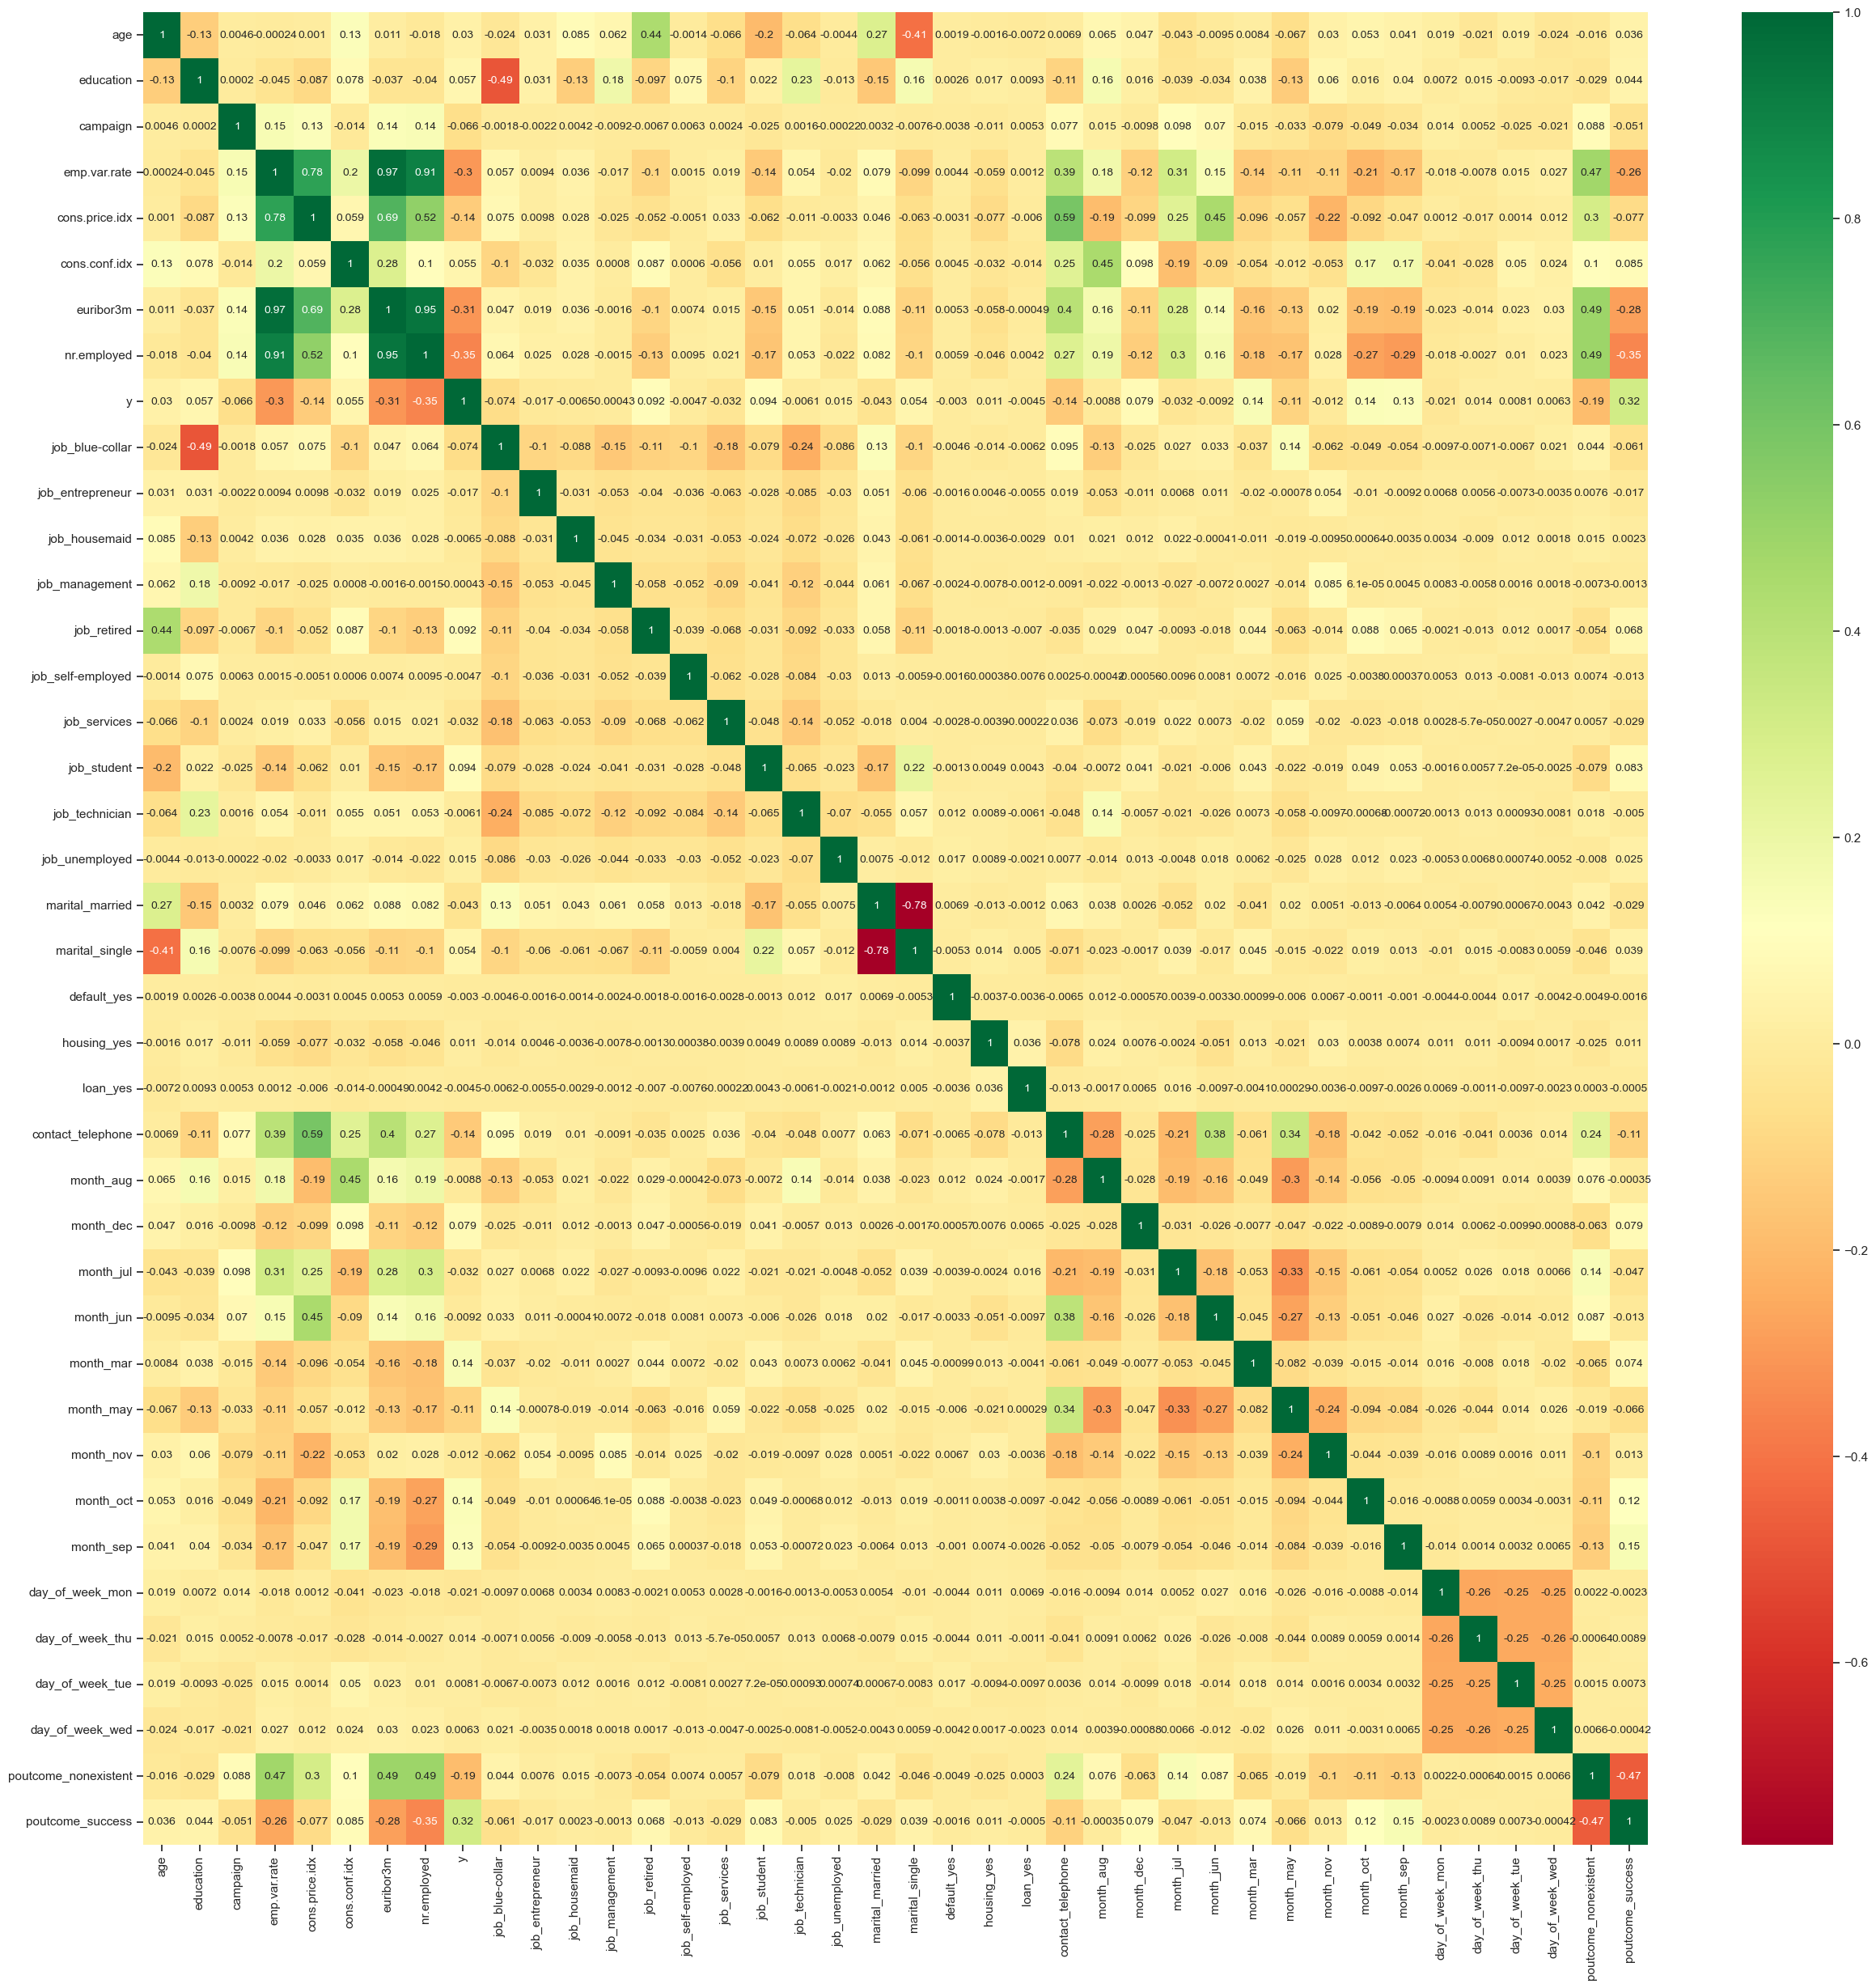

In [53]:
plt.figure(figsize = (30, 30))
l = ['previous', 'pdays', 'duration']
target_corr = df.drop(l, axis = 1).corr()
sns.heatmap(target_corr, annot = True, cmap = 'RdYlGn', annot_kws = {'size':10})
plt.show()

In [54]:
df.describe()

age     education      duration      campaign         pdays  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380      3.704901    258.315815      2.567879    962.464810   
std       10.42068      2.081271    259.305321      2.770318    186.937102   
min       17.00000      0.000000      0.000000      1.000000      0.000000   
25%       32.00000      2.000000    102.000000      1.000000    999.000000   
50%       38.00000      3.000000    180.000000      2.000000    999.000000   
75%       47.00000      6.000000    319.000000      3.000000    999.000000   
max       98.00000      6.000000   4918.000000     56.000000    999.000000   

           previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
count  41176.000000  41176.000000    41176.000000   41176.000000   
mean       0.173013      0.081922       93.575720     -40.502863   
std        0.494964      1.570883        0.578839       4.627860   
min        0.000000     -3.400000       92.201000     -50.800000   
25%        0.000000     -1.800000       93.075000     -42.700000   
50%        0.000000      1.100000       93.749000     -41.800000   
75%        0.000000      1.400000       93.994000     -36.400000   
max        7.000000      1.400000       94.767000     -26.900000   

          euribor3m   nr.employed             y  job_blue-collar  \
count  41176.000000  41176.000000  41176.000000     41176.000000   
mean       3.621293   5167.034870      0.112663         0.224718   
std        1.734437     72.251364      0.316184         0.417402   
min        0.634000   4963.600000      0.000000         0.000000   
25%        1.344000   5099.100000      0.000000         0.000000   
50%        4.857000   5191.000000      0.000000         0.000000   
75%        4.961000   5228.100000      0.000000         0.000000   
max        5.045000   5228.100000      1.000000         1.000000   

       job_entrepreneur  job_housemaid  job_management   job_retired  \
count      41176.000000   41176.000000    41176.000000  41176.000000   
mean           0.035360       0.025743        0.071012      0.041723   
std            0.184691       0.158370        0.256848      0.199959   
min            0.000000       0.000000        0.000000      0.000000   
25%            0.000000       0.000000        0.000000      0.000000   
50%            0.000000       0.000000        0.000000      0.000000   
75%            0.000000       0.000000        0.000000      0.000000   
max            1.000000       1.000000        1.000000      1.000000   

       job_self-employed  job_services   job_student  job_technician  \
count       41176.000000  41176.000000  41176.000000    41176.000000   
mean            0.034510      0.096343      0.021250        0.163663   
std             0.182538      0.295064      0.144219        0.369974   
min             0.000000      0.000000      0.000000        0.000000   
25%             0.000000      0.000000      0.000000        0.000000   
50%             0.000000      0.000000      0.000000        0.000000   
75%             0.000000      0.000000      0.000000        0.000000   
max             1.000000      1.000000      1.000000        1.000000   

       job_unemployed  marital_married  marital_single   default_yes  \
count    41176.000000     41176.000000    41176.000000  41176.000000   
mean         0.024626         0.607174        0.280843      0.000073   
std          0.154984         0.488385        0.449417      0.008535   
min          0.000000         0.000000        0.000000      0.000000   
25%          0.000000         0.000000        0.000000      0.000000   
50%          0.000000         1.000000        0.000000      0.000000   
75%          0.000000         1.000000        1.000000      0.000000   
max          1.000000         1.000000        1.000000      1.000000   

        housing_yes      loan_yes  contact_telephone     month_aug  \
count  41176.000000  41176.000000       41176.000000  41176.000000   

## Test Data

In [55]:
df_test = pd.read_csv('bank-additional.csv')
df_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [56]:
df_test.y = df_test.y.map({"yes":1, "no":0})                                            

In [57]:
print(df_test.duplicated().sum())

0


In [58]:
df_test.drop_duplicates(keep = False).shape

df_test.drop_duplicates(inplace=True)


In [59]:
mr = sv.analyze(df_test)
mr.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [60]:
continous_data_test = df_test[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]

In [61]:
categorical_data_test = df_test[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']]  

In [62]:
print(df_test.describe()) 
print(df_test.describe(include= 'O'))
                        
for feature in categorical_data_test.columns:
    mode_value = df_test[feature].mode()[0]
    df_test[feature].replace('unknown', mode_value, inplace = True)

# Encoding of categorical columns:
LE = LabelEncoder()   
  
# Ordinal Features Encoding :                        
ordinal_features = df_test[['education']]
                        
for column in ordinal_features.columns:
    df_test[column] = LE.fit_transform(df_test[column])
                        
# Nominal Encoding:
                        
nominal_features  = ['job','marital','default','housing', 'loan','contact','month','day_of_week','poutcome']
df_test = pd.get_dummies(df_test, columns = nominal_features, drop_first= True)   
     
# Replace the oulier values in continous features is replaced with median value of each features:                        
outlier_feature = df_test[['age','previous','cons.conf.idx']]      
                        
# Replacing outliers in discrete and categorical values with mode of that features:
discrete_outlier = df_test[['duration','previous' ,'campaign', 'pdays']] 
                        
scaler= StandardScaler()
df_test[['age','duration','pdays','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] =  scaler.fit_transform(df_test[['age','duration','pdays','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']])   



               age     duration     campaign        pdays     previous  \
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000   
mean     40.113620   256.788055     2.537266   960.422190     0.190337   
std      10.313362   254.703736     2.568159   191.922786     0.541788   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  \
count   4119.000000     4119.000000    4119.000000  4119.000000  4119.000000   
mean       0.084972       93.579704     -40.499102     3.621356  5166.481695   
std        1.563114        0.579349       4.594578     1.733591    73.667904   
min       -3.

In [63]:
y = df.y

We should drop both 'pdays' and 'previous' features because they have no variability, meaning all their values are the same. Including them won't improve the model and might even introduce noise and In order to make realistic Predictive model we will drop duration(clearly Mentioned in the Problem statement)

In [64]:
l2 = ['duration','pdays','previous','y']
X = df.drop(l2,axis = 1)

In [65]:
X.head()

age  education  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   56          0         1           1.1          93.994          -36.4   
1   57          3         1           1.1          93.994          -36.4   
2   37          3         1           1.1          93.994          -36.4   
3   40          1         1           1.1          93.994          -36.4   
4   56          3         1           1.1          93.994          -36.4   

   euribor3m  nr.employed  job_blue-collar  job_entrepreneur  job_housemaid  \
0      4.857       5191.0                0                 0              1   
1      4.857       5191.0                0                 0              0   
2      4.857       5191.0                0                 0              0   
3      4.857       5191.0                0                 0              0   
4      4.857       5191.0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             1            0   
2               0            0                  0             1            0   
3               0            0                  0             0            0   
4               0            0                  0             1            0   

   job_technician  job_unemployed  marital_married  marital_single  \
0               0               0                1               0   
1               0               0                1               0   
2               0               0                1               0   
3               0               0                1               0   
4               0               0                1               0   

   default_yes  housing_yes  loan_yes  contact_telephone  month_aug  \
0            0            0         0                  1          0   
1            0            0         0                  1          0   
2            0            1         0                  1          0   
3            0            0         0                  1          0   
4            0            0         1                  1          0   

   month_dec  month_jul  month_jun  month_mar  month_may  month_nov  \
0          0          0          0          0          1          0   
1          0          0          0          0          1          0   
2          0          0          0          0          1          0   
3          0          0          0          0          1          0   
4          0          0          0          0          1          0   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0          0                1                0                0   
1          0          0                1                0                0   
2          0          0                1                0                0   
3          0          0                1                0                0   
4          0          0                1                0                0   

   day_of_week_wed  poutcome_nonexistent  poutcome_success  
0                0                     1                 0  
1                0                     1                 0  
2                0                     1                 0  
3                0                     1                 0  
4                0                     1                 0

In [66]:
X.columns

Index(['age', 'education', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [67]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int64

## Model Training and Model Building:

This will split your data x and target y into training and testing sets, with 75% of the data used for training and 25% for testing. The stratify=y argument ensures that the class distribution in the target variable y is preserved in both the training and testing sets. The random_state=42 argument sets the random seed for reproducibility.

In [68]:
print("Counter value : ",Counter(y))

Counter value :  Counter({0: 36537, 1: 4639})


In [69]:
smot = SMOTE(random_state=42)
X_sm, y_sm = smot.fit_resample(X,y)

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X_sm, y_sm, stratify=y_sm , test_size = 0.25, random_state = 42 )

In [71]:
X_test.shape,y_test.shape

((18269, 39), (18269,))

In [72]:
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 27403, 0: 27402})
Counter({0: 9135, 1: 9134})


## 1. Logistic Regression

In [73]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [74]:
print("Accuracy for Traing dataset : ",lr.score(X_train,y_train)*100) # Accuracy for training dataset
print("Accuracy for Test dataset : ",lr.score(X_test,y_test)*100) # Accuracy for test dataset

Accuracy for Traing dataset :  78.86871635799653
Accuracy for Test dataset :  79.13952597295966


In [75]:
lr_f1 = f1_score(y_test, lr_pred)
print("Logistic Regression f1_score : {}".format(lr_f1))
print("..................................")

lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression accuracy_score : {}".format(lr_acc))
print("...........................................")

lr_recall = recall_score(y_test, lr_pred)
print("Logistic Regression recall_score : {}".format(lr_recall))
print("..................................")

lr_pre = precision_score(y_test, lr_pred)
print("Logistic Regression precision_score : {}".format(lr_pre))
print()

Logistic Regression f1_score : 0.7822161266358078
..................................
Logistic Regression accuracy_score : 0.7913952597295966
...........................................
Logistic Regression recall_score : 0.7492883731114517
..................................
Logistic Regression precision_score : 0.8181709503885236



In [76]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      9135
           1       0.82      0.75      0.78      9134

    accuracy                           0.79     18269
   macro avg       0.79      0.79      0.79     18269
weighted avg       0.79      0.79      0.79     18269



Text(37.22222222222222, 0.5, 'Actual_values')

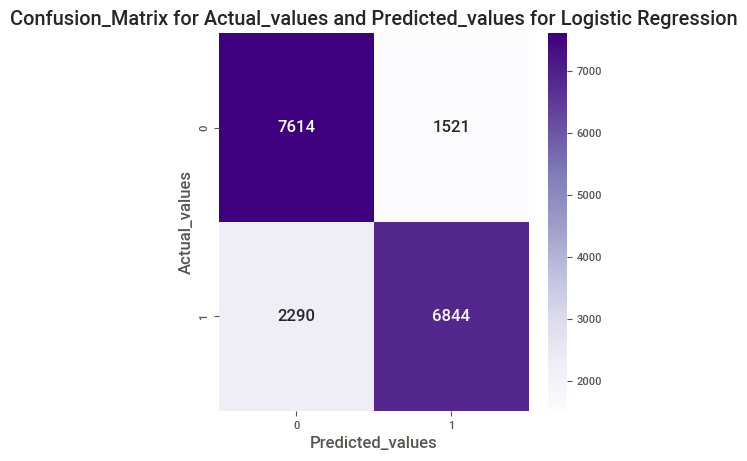

In [77]:
plt.figure(figsize = (5, 5))
cm =confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Purples')
plt.title("Confusion_Matrix for Actual_values and Predicted_values for Logistic Regression")
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")

## 2. Decision Tree Classifier:

In [78]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)

In [79]:
print("Accuracy for Traing dataset : ",dt.score(X_train,y_train)*100) # Accuracy for training dataset
print("Accuracy for Test dataset : ",dt.score(X_test,y_test)*100) # Accuracy for test dataset

Accuracy for Traing dataset :  99.5839795639084
Accuracy for Test dataset :  89.7969237506158


In [80]:
dt_f1 = f1_score(y_test, dt_pred)
print("Decision Tree Classifier f1_score : {}".format(dt_f1))
print("..................................")

dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Classifier accuracy_score : {}".format(dt_acc))
print("...........................................")

dt_recall = recall_score(y_test, dt_pred)
print("Decision Tree Classifier recall_score : {}".format(dt_recall))
print("..................................")

dt_pre = precision_score(y_test, dt_pred)
print("Decision Tree Classifier precision_score : {}".format(dt_pre))
print()

Decision Tree Classifier f1_score : 0.8992759105155086
..................................
Decision Tree Classifier accuracy_score : 0.897969237506158
...........................................
Decision Tree Classifier recall_score : 0.9109918984015766
..................................
Decision Tree Classifier precision_score : 0.8878574477166027



In [81]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      9135
           1       0.89      0.91      0.90      9134

    accuracy                           0.90     18269
   macro avg       0.90      0.90      0.90     18269
weighted avg       0.90      0.90      0.90     18269



Text(37.22222222222222, 0.5, 'Actual_values')

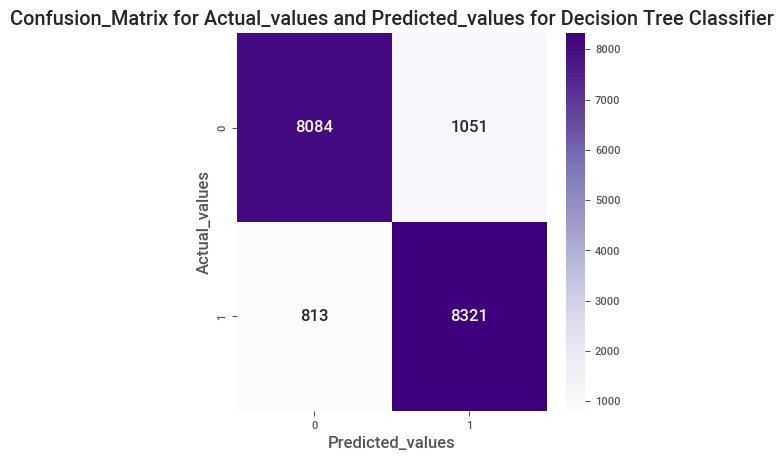

In [82]:
plt.figure(figsize = (5, 5))
cm =confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Purples')
plt.title("Confusion_Matrix for Actual_values and Predicted_values for Decision Tree Classifier")
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")

## 3. K-Nearest Neighbors Classifier(Knn)

In [83]:
knn = KNeighborsClassifier()

In [84]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    error_rate.append(np.mean(knn_pred != y_test))

In [85]:
error_rate

[0.11423723247030489,
 0.10684766544419508,
 0.13268378126881603,
 0.12381630083748427,
 0.14554710164759976,
 0.1362417209480541,
 0.15567354535004652,
 0.14549236411407301,
 0.161037823635667,
 0.1517324429361213]

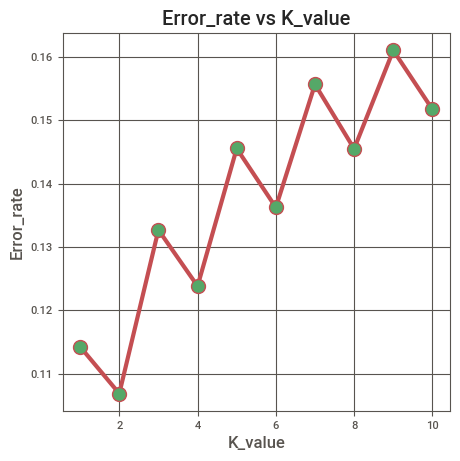

In [86]:
plt.figure(figsize = (5, 5))
plt.plot(range(1, 11),error_rate,  color='r', linestyle='-',linewidth = 3,
         marker='o',markerfacecolor='g', markersize=10)

plt.title("Error_rate vs K_value")
plt.xlabel("K_value")
plt.ylabel("Error_rate")
plt.grid()
plt.show()

In [87]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred=knn.predict(X_test)

In [88]:
print("Accuracy for Traing dataset : ",knn.score(X_train,y_train)*100) # Accuracy for training dataset
print("Accuracy for Test dataset : ",knn.score(X_test,y_test)*100) # Accuracy for test dataset

Accuracy for Traing dataset :  87.94453060852112
Accuracy for Test dataset :  84.82675570638787


In [89]:
knn_f1 = f1_score(y_test, knn_pred)
print("K-Nearest Neighbors Classifier f1_score : {}".format(knn_f1))
print("..................................")

knn_acc = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors Classifier accuracy_score : {}".format(knn_acc))
print("...........................................")

knn_recall = recall_score(y_test, knn_pred)
print("K-Nearest Neighbors Classifier recall_score : {}".format(knn_recall))
print("..................................")

knn_pre = precision_score(y_test, knn_pred)
print("K-Nearest Neighbors Classifier precision_score : {}".format(knn_pre))
print()

K-Nearest Neighbors Classifier f1_score : 0.8611778846153847
..................................
K-Nearest Neighbors Classifier accuracy_score : 0.8482675570638787
...........................................
K-Nearest Neighbors Classifier recall_score : 0.941318151959711
..................................
K-Nearest Neighbors Classifier precision_score : 0.7936127007568765



In [90]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      9135
           1       0.79      0.94      0.86      9134

    accuracy                           0.85     18269
   macro avg       0.86      0.85      0.85     18269
weighted avg       0.86      0.85      0.85     18269



Text(37.22222222222222, 0.5, 'Actual_values')

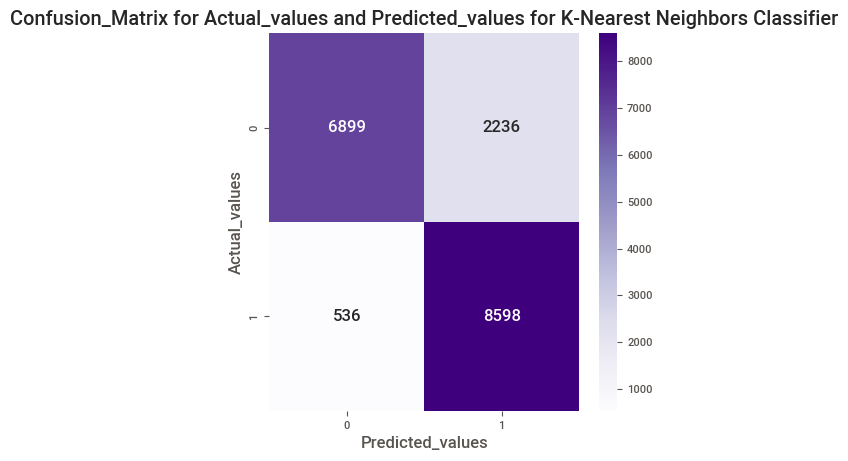

In [91]:
plt.figure(figsize = (5, 5))
cm =confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Purples')
plt.title("Confusion_Matrix for Actual_values and Predicted_values for K-Nearest Neighbors Classifier")
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")

## 4. Support Vector Machine(SVM)

In [92]:
svm=SVC()
svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)

In [93]:
print("Accuracy for Traing dataset : ",svm.score(X_train,y_train)*100) # Accuracy for training dataset
print("Accuracy for Test dataset : ",svm.score(X_test,y_test)*100) # Accuracy for test dataset

Accuracy for Traing dataset :  71.60478058571297
Accuracy for Test dataset :  72.20428047512179


In [94]:
svm_f1 = f1_score(y_test, svm_pred)
print("SVC f1_score : {}".format(svm_f1))
print(".......................")

svm_acc = accuracy_score(y_test, svm_pred)
print("SVC accuracy_score : {}".format(svm_acc))
print(".......................")

svm_recall = recall_score(y_test, svm_pred)
print("SVC recall_score : {}".format(svm_recall))
print(".......................") 

svm_pre = precision_score(y_test, svm_pred)
print("SVC precision_score : {}".format(svm_pre))
print()

SVC f1_score : 0.7203744493392069
.......................
SVC accuracy_score : 0.722042804751218
.......................
SVC recall_score : 0.7161156119991241
.......................
SVC precision_score : 0.7246842455129625



In [95]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      9135
           1       0.72      0.72      0.72      9134

    accuracy                           0.72     18269
   macro avg       0.72      0.72      0.72     18269
weighted avg       0.72      0.72      0.72     18269



Text(37.22222222222222, 0.5, 'Actual_values')

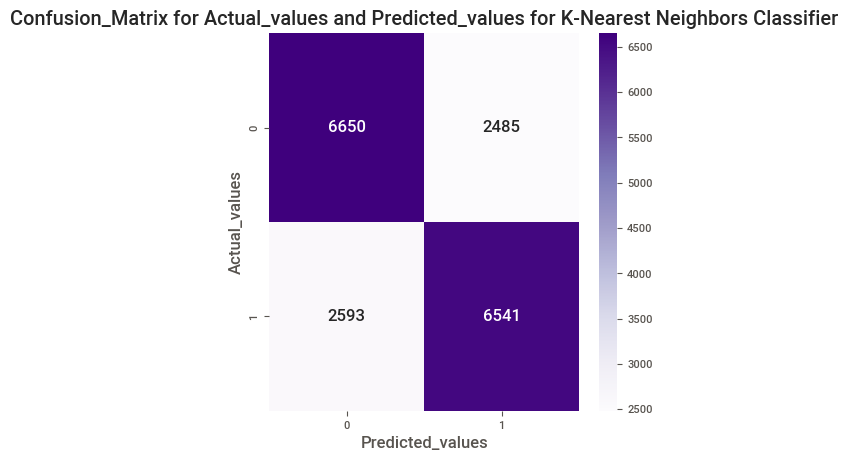

In [96]:
plt.figure(figsize = (5, 5))
cm =confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Purples')
plt.title("Confusion_Matrix for Actual_values and Predicted_values for K-Nearest Neighbors Classifier")
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")

## 5. Bagging Classifier

In [97]:
bs = DecisionTreeClassifier(random_state=1)
bg_model = BaggingClassifier(random_state=42)
bg_model.fit(X_train,y_train)
bg_pred=bg_model.predict(X_test)

In [98]:
print("Accuracy for Traing dataset : ",bg_model.score(X_train,y_train)*100) # Accuracy for training dataset
print("Accuracy for Test dataset : ",bg_model.score(X_test,y_test)*100) # Accuracy for test dataset

Accuracy for Traing dataset :  98.97454611805492
Accuracy for Test dataset :  92.05211013191746


In [99]:
bg_f1 = f1_score(y_test, bg_pred)
print("Bagging Classifier f1_score {}".format(bg_f1))
print("............................")

bg_acc = accuracy_score(y_test, bg_pred)
print("Bagging Classifier accuracy_score {}".format(bg_acc))
print("............................")

bg_recall = recall_score(y_test, bg_pred)
print("Bagging Classifier recall_score {}".format(bg_recall))
print("............................")

bg_pre = precision_score(y_test, bg_pred)
print("Bagging Classifier precision_score {}".format(bg_pre))
print("............................")
print()

Bagging Classifier f1_score 0.9199647227428067
............................
Bagging Classifier accuracy_score 0.9205211013191745
............................
Bagging Classifier recall_score 0.9136194438362163
............................
Bagging Classifier precision_score 0.926398756660746
............................



In [100]:
print(classification_report(y_test,bg_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      9135
           1       0.93      0.91      0.92      9134

    accuracy                           0.92     18269
   macro avg       0.92      0.92      0.92     18269
weighted avg       0.92      0.92      0.92     18269



Text(37.22222222222222, 0.5, 'Actual_values')

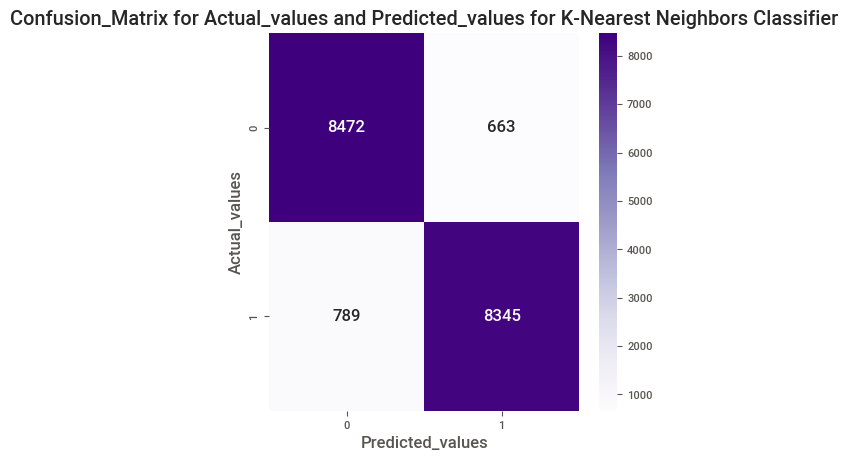

In [101]:
plt.figure(figsize = (5, 5))
cm =confusion_matrix(y_test, bg_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Purples')
plt.title("Confusion_Matrix for Actual_values and Predicted_values for K-Nearest Neighbors Classifier")
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")

## 6. Random Forest Classifier

In [102]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [103]:
print("Accuracy for Traing dataset : ",rf.score(X_train,y_train)*100) # Accuracy for training dataset
print("Accuracy for Test dataset : ",rf.score(X_test,y_test)*100) # Accuracy for test dataset

Accuracy for Traing dataset :  99.58033026183742
Accuracy for Test dataset :  92.51737916689474


In [104]:
rf_f1 = f1_score(y_test, rf_pred)
print("RandomForestClassifier f1_score : {}".format(rf_f1))
print("....................................")

rf_acc = accuracy_score(y_test, rf_pred)
print("RandomForestClassifier accuracy_score : {}".format(rf_acc))
print(".........................................")

rf_recall = recall_score(y_test, rf_pred)
print("RandomForestClassifier recall_score : {}".format(rf_recall))
print("........................................")

rf_pre = precision_score(y_test, rf_pred)
print("RandomForestClassifier precision_score : {}".format(rf_pre))
print()

RandomForestClassifier f1_score : 0.9250753631131817
....................................
RandomForestClassifier accuracy_score : 0.9251737916689474
.........................................
RandomForestClassifier recall_score : 0.9239106634552222
........................................
RandomForestClassifier precision_score : 0.9262430029634507



In [105]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      9135
           1       0.93      0.92      0.93      9134

    accuracy                           0.93     18269
   macro avg       0.93      0.93      0.93     18269
weighted avg       0.93      0.93      0.93     18269



Text(37.22222222222222, 0.5, 'Actual_values')

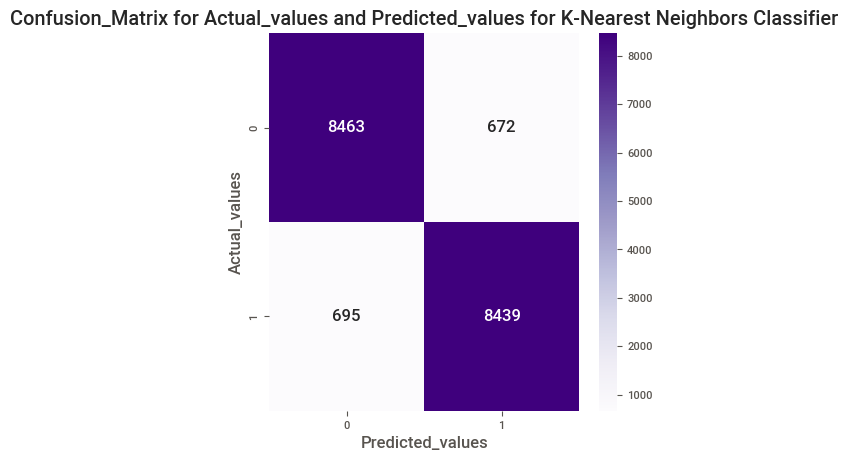

In [106]:
plt.figure(figsize = (5, 5))
cm =confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Purples')
plt.title("Confusion_Matrix for Actual_values and Predicted_values for K-Nearest Neighbors Classifier")
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")

## 7. AdaBoost Classifier

In [107]:
ad = AdaBoostClassifier(n_estimators=300)
ad.fit(X_train,y_train)
ad_pred=ad.predict(X_test)

In [108]:
print("Accuracy for Traing dataset : ",ad.score(X_train,y_train)*100) # Accuracy for training dataset
print("Accuracy for Test dataset : ",ad.score(X_test,y_test)*100) # Accuracy for test dataset

Accuracy for Traing dataset :  85.8680777301341
Accuracy for Test dataset :  86.11856149761891


In [109]:
ad_f1 = f1_score(y_test, ad_pred)
print("AdaBoost Classifier f1_score : {}".format(ad_f1))
print("...............................")

ad_acc = accuracy_score(y_test, ad_pred)
print("AdaBoost Classifier accuracy_score : {}".format(ad_acc))
print("...............................")

ad_recall = recall_score(y_test, ad_pred)
print("AdaBoost Classifier recall_score : {}".format(ad_recall))
print("...............................")

ad_pre = precision_score(y_test, ad_pred)
print("AdaBoost Classifier precision_score : {}".format(ad_pre))
print("...............................")
print()

AdaBoost Classifier f1_score : 0.8594235033259422
...............................
AdaBoost Classifier accuracy_score : 0.8611856149761892
...............................
AdaBoost Classifier recall_score : 0.8486971753886577
...............................
AdaBoost Classifier precision_score : 0.8704244329665394
...............................



In [110]:
print(classification_report(y_test,ad_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      9135
           1       0.87      0.85      0.86      9134

    accuracy                           0.86     18269
   macro avg       0.86      0.86      0.86     18269
weighted avg       0.86      0.86      0.86     18269



Text(37.22222222222222, 0.5, 'Actual_values')

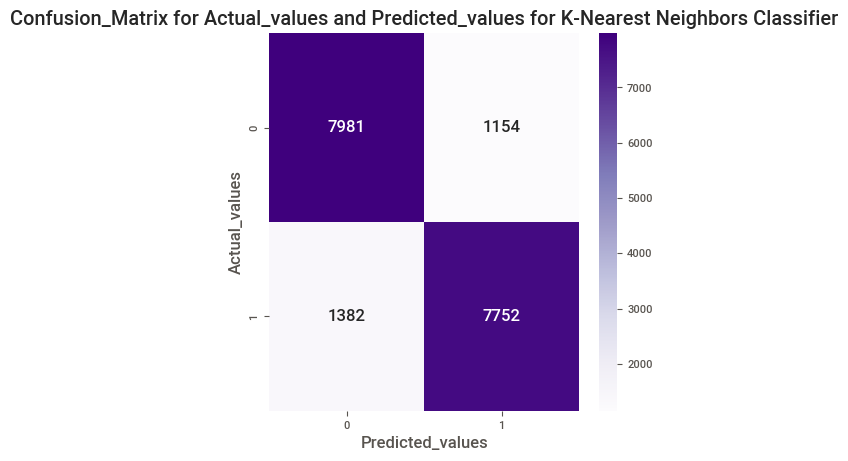

In [111]:
plt.figure(figsize = (5, 5))
cm =confusion_matrix(y_test, ad_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Purples')
plt.title("Confusion_Matrix for Actual_values and Predicted_values for K-Nearest Neighbors Classifier")
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")

## 8. GradientBoosting Classifier

In [112]:
gbc = GradientBoostingClassifier(n_estimators=400)
gbc.fit(X_train,y_train)
gb_pred=gbc.predict(X_test)

In [113]:
print("Accuracy for Traing dataset : ",gbc.score(X_train,y_train)*100) # Accuracy for training dataset
print("Accuracy for Test dataset : ",gbc.score(X_test,y_test)*100) # Accuracy for test dataset

Accuracy for Traing dataset :  89.05209378706323
Accuracy for Test dataset :  88.9156494608353


In [114]:
gb_f1= f1_score(y_test, gb_pred)
print("GradientBoosting Classifier f1_score : {}".format(gb_f1))
print("........................................")

gb_acc = accuracy_score(y_test, gb_pred)
print("GradientBoosting Classifier accuracy_score : {}".format(gb_acc))
print("...............................................")

gb_recall = recall_score(y_test, gb_pred)
print("GradientBoosting Classifier recall_score : {}".format(gb_recall))
print("............................................")

gb_pre = precision_score(y_test, gb_pred)
print("GradientBoosting Classifier Precision_score : {}".format(gb_pre))
print()

GradientBoosting Classifier f1_score : 0.8872054809781095
........................................
GradientBoosting Classifier accuracy_score : 0.889156494608353
...............................................
GradientBoosting Classifier recall_score : 0.8719071600613094
............................................
GradientBoosting Classifier Precision_score : 0.903050232452659



In [115]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      9135
           1       0.90      0.87      0.89      9134

    accuracy                           0.89     18269
   macro avg       0.89      0.89      0.89     18269
weighted avg       0.89      0.89      0.89     18269



Text(37.22222222222222, 0.5, 'Actual_values')

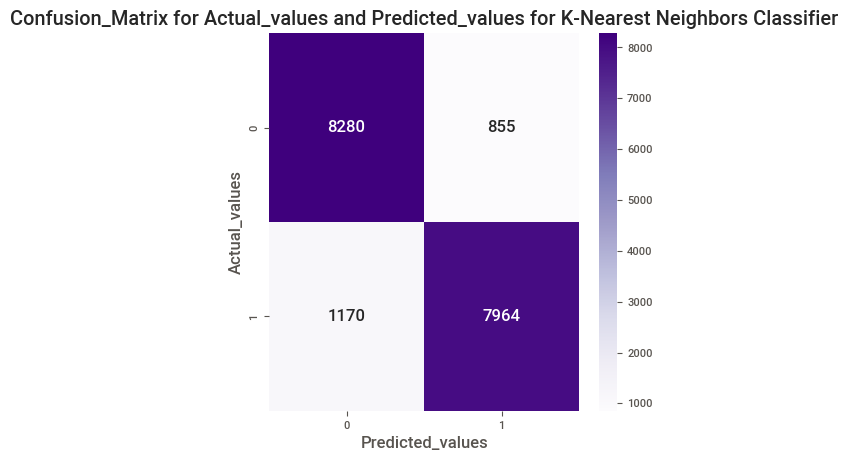

In [116]:
plt.figure(figsize = (5, 5))
cm =confusion_matrix(y_test, gb_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Purples')
plt.title("Confusion_Matrix for Actual_values and Predicted_values for K-Nearest Neighbors Classifier")
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")

## 9. XGBoost Classifier

In [117]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [118]:
print("Accuracy for Traing dataset : ",xgb.score(X_train,y_train)*100) # Accuracy for training dataset
print("Accuracy for Test dataset : ",xgb.score(X_test,y_test)*100) # Accuracy for test dataset

Accuracy for Traing dataset :  92.08101450597573
Accuracy for Test dataset :  90.3826153593519


In [119]:
xgb_f1 = f1_score(y_test, xgb_pred)
print("XGBoost Classifier f1_score:  {}".format(xgb_f1))
print("........................")

xgb_acc = accuracy_score(y_test, xgb_pred)
print("XGBoost Classifier accuracy_score : {}".format(xgb_acc))
print(".............................")

xgb_recall = recall_score(y_test, xgb_pred)
print("XGBoost Classifier recall_score:  {}".format(xgb_recall))
print("............................")

xgb_precision = precision_score(y_test, xgb_pred)
print("XGBoost Classifier precision_score : {}".format(xgb_precision))

XGBoost Classifier f1_score:  0.9024268340089966
........................
XGBoost Classifier accuracy_score : 0.903826153593519
.............................
XGBoost Classifier recall_score:  0.8895336106853514
............................
XGBoost Classifier precision_score : 0.9156993125211316


In [120]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      9135
           1       0.92      0.89      0.90      9134

    accuracy                           0.90     18269
   macro avg       0.90      0.90      0.90     18269
weighted avg       0.90      0.90      0.90     18269



Text(37.22222222222222, 0.5, 'Actual_values')

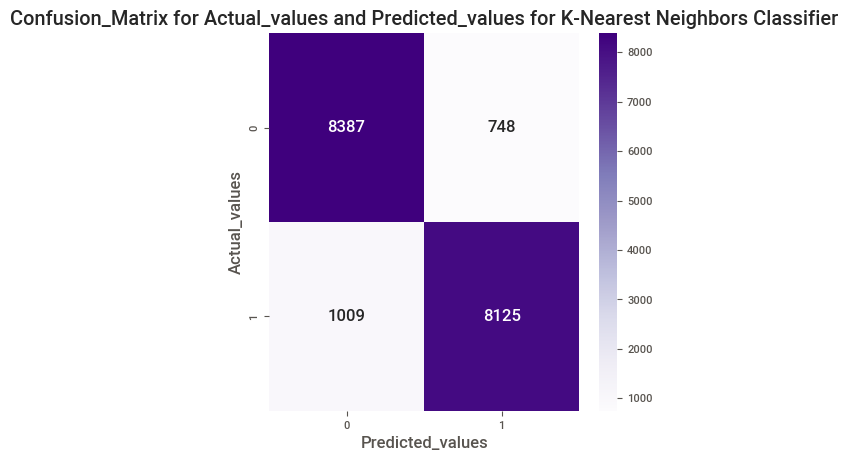

In [121]:
plt.figure(figsize = (5, 5))
cm =confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Purples')
plt.title("Confusion_Matrix for Actual_values and Predicted_values for K-Nearest Neighbors Classifier")
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")

## Hyperparameter Tuning 

In [122]:
param_grid_bg = {
    'n_estimators': [10, 50, 100],  # Number of base estimators
    'max_samples': [0.5, 0.7, 1.0],  # Number of samples to draw from X to train each base estimator
    'max_features': [0.5, 0.7, 1.0]  # Number of features to draw from X to train each base estimator
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 3, 5, 7],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}


# Initialize classifiers
bgg = BaggingClassifier()
rf = RandomForestClassifier()

# Create a list of dictionaries for algorithms and their respective parameter grids
models = [
    
    {'classifier': bgg, 'param_grid': param_grid_bg},
    {'classifier': rf, 'param_grid': param_grid_rf},
]

# Perform GridSearchCV for each algorithm
for model in models:
    grid_search = GridSearchCV(model['classifier'], model['param_grid'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Print best parameters and best score for each algorithm
    print("Best Parameters for", model['classifier'].__class__.__name__, ":", grid_search.best_params_)
    print("Best Score for", model['classifier'].__class__.__name__, ":", grid_search.best_score_)

    # Evaluate on test set
    best_model = grid_search.best_estimator_
    test_accuracy = best_model.score(X_test, y_test)*100
    print("Test Accuracy for", model['classifier'].__class__.__name__, ":", test_accuracy,"\n")
    print("*****************************************************************")


Best Parameters for BaggingClassifier : {'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 100}
Best Score for BaggingClassifier : 0.9293130188851382
Test Accuracy for BaggingClassifier : 93.41507471673326 

*****************************************************************
Best Parameters for RandomForestClassifier : {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score for RandomForestClassifier : 0.9190219870449777
Test Accuracy for RandomForestClassifier : 92.49001040013137 

*****************************************************************


## Comparing all the Models

In [123]:
scores = {
    'Classifier': ['Logistic Regression', 'Decision Tree', 'KNeighborsClassifier','Support Vector C','Bagging','Random Forest', 'AdaBoost','Gradient Boosting','XGBoost'],
    'F1 Score': [0.7822161266358078, 0.8982482698961938, 0.8611778846153847, 0.7203744493392069, 0.9199647227428067, 0.9250753631131817, 0.8594235033259422, 0.8872054809781095, 0.9024268340089966]
} 
scores_df = pd.DataFrame(scores)
scores_df = scores_df.sort_values(by='F1 Score', ascending=False)
scores_df

Classifier  F1 Score
5         Random Forest  0.925075
4               Bagging  0.919965
8               XGBoost  0.902427
1         Decision Tree  0.898248
7     Gradient Boosting  0.887205
2  KNeighborsClassifier  0.861178
6              AdaBoost  0.859424
0   Logistic Regression  0.782216
3      Support Vector C  0.720374

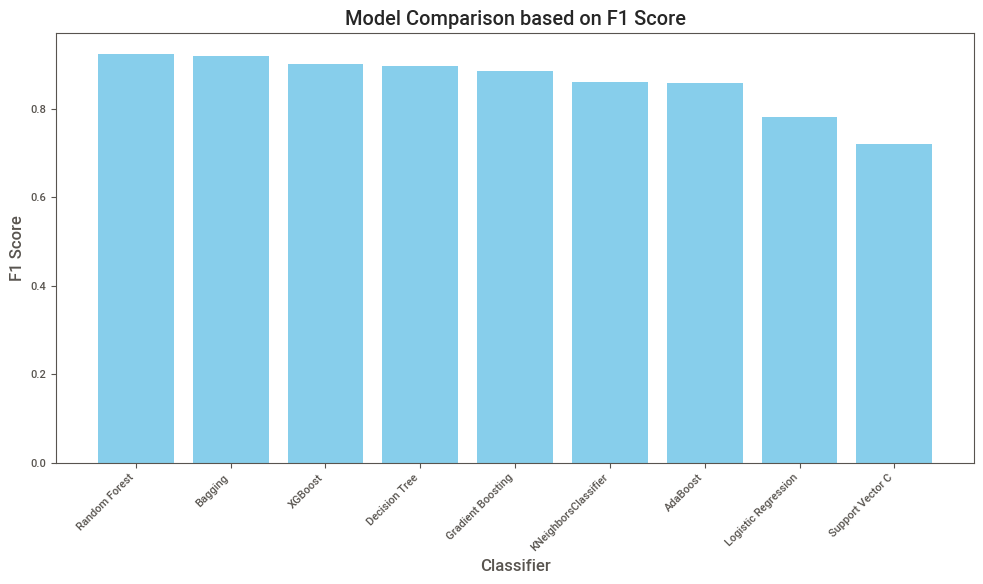

In [124]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(scores_df['Classifier'], scores_df['F1 Score'], color='skyblue')
plt.title('Model Comparison based on F1 Score')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Suggestion to which Model Select:

**Based on the performance metrics, we recommend considering the following two models:**
- **Random Forest:**
  - With the highest F1 score of 0.9250, Random Forest offers excellent overall performance across all metrics, including accuracy, recall, and precision. It's a robust ensemble method that handles complex datasets well and reduces the risk of overfitting.

- **BaggingClassifier:**
  - With a slightly lower but still strong F1 score of 0.9199, Bagging provides high accuracy and precision while maintaining a good balance between recall and precision. It's particularly effective in improving predictive performance through sequential learning and gradient descent optimization.

# Conclusion

The conclusion for the Portuguesebank prediction project can be summarized as follows:

**1. Predictive Power:** The application of machine learning models has shown significant predictive power in identifying potential customers likely to subscribe to a bank term deposit.

**2. Customer Insights:** The analysis has provided deeper insights into customer behavior, which can inform more effective marketing strategies.

**3. Model Performance:** The performance of various models can be compared to determine the most effective approach for the dataset.

**4. Future Directions:** Suggestions for future work could include implementing more complex models or integrating additional data sources to improve prediction accuracy.
